In [1]:
import tensorflow as tf
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, HTML

In [2]:
from keras.models import Sequential
from keras.layers import *
gan_generator = load_model("./model/acgan/ACGAN_generator.h5")
gan_generator.summary()

# class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Latent_Noise_Vector_z (InputLa  [(None, 128)]       0           []                               
 yer)                                                                                             
                                                                                                  
 Conditions_y (InputLayer)      [(None, 10)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 138)          0           ['Latent_Noise_Vector_z[0][0]',  
                                                                  'Conditions_y[0][0]']           
                                                                                          

4/4 [==============================] - 0s 21ms/step


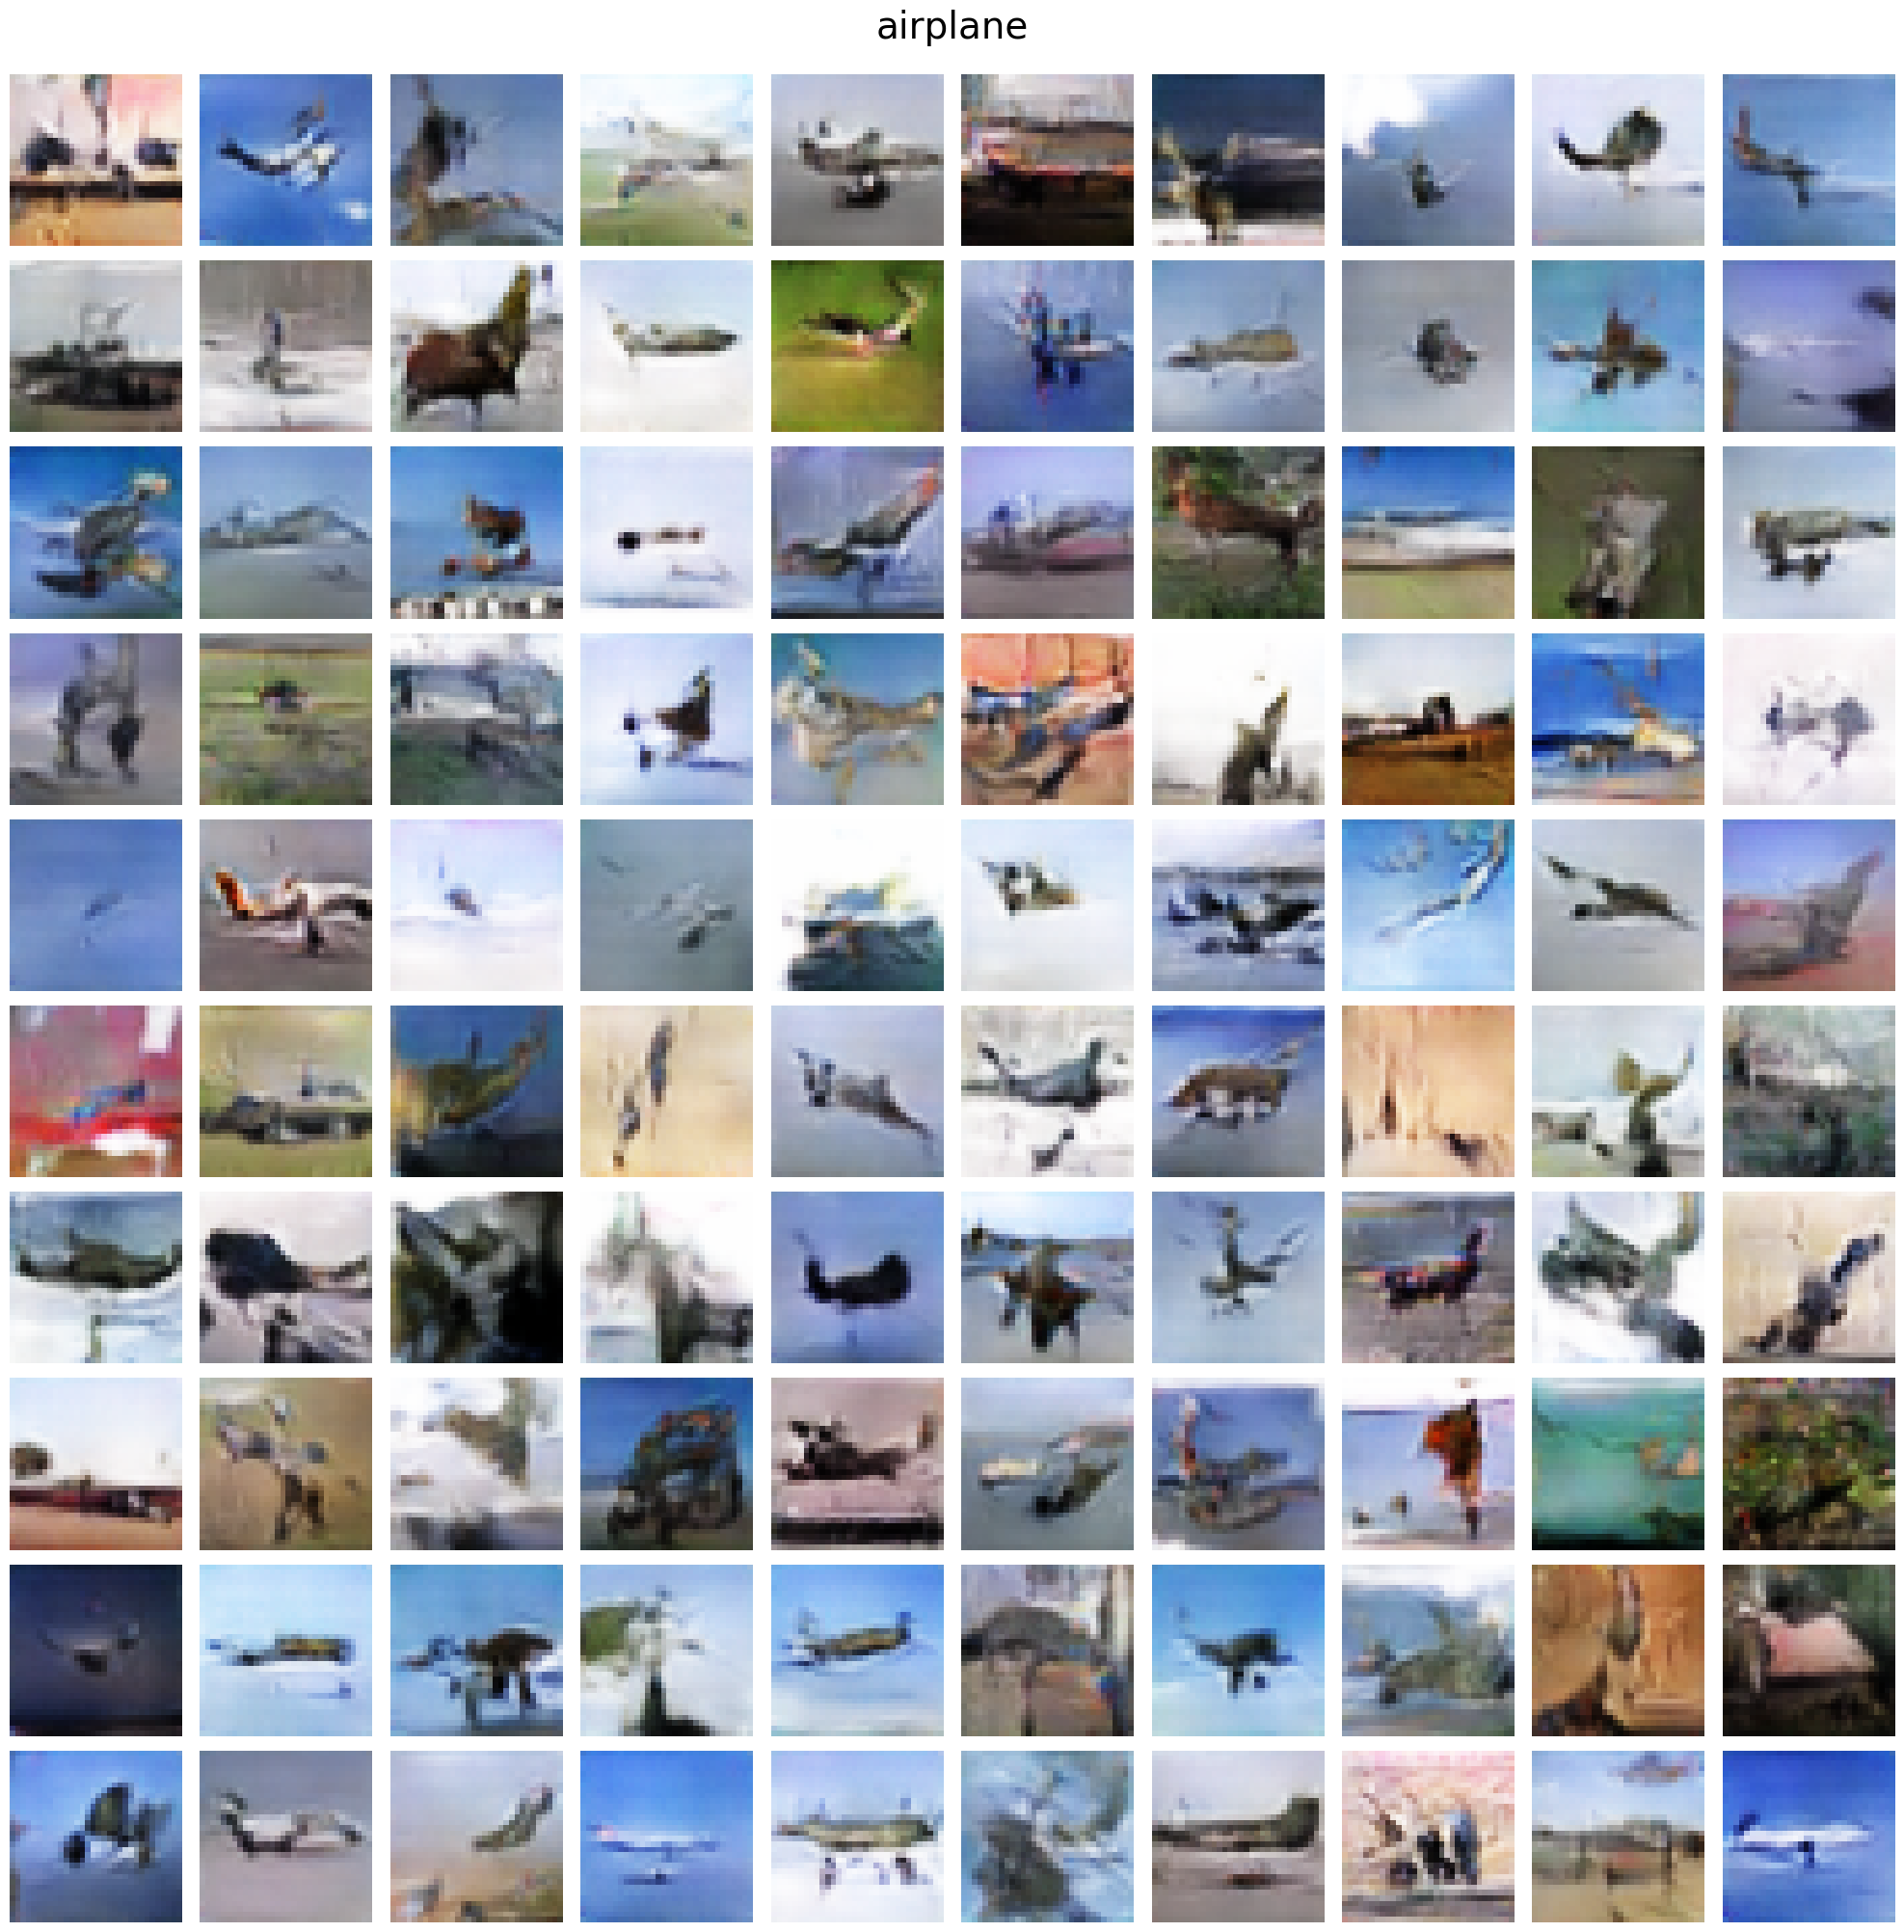

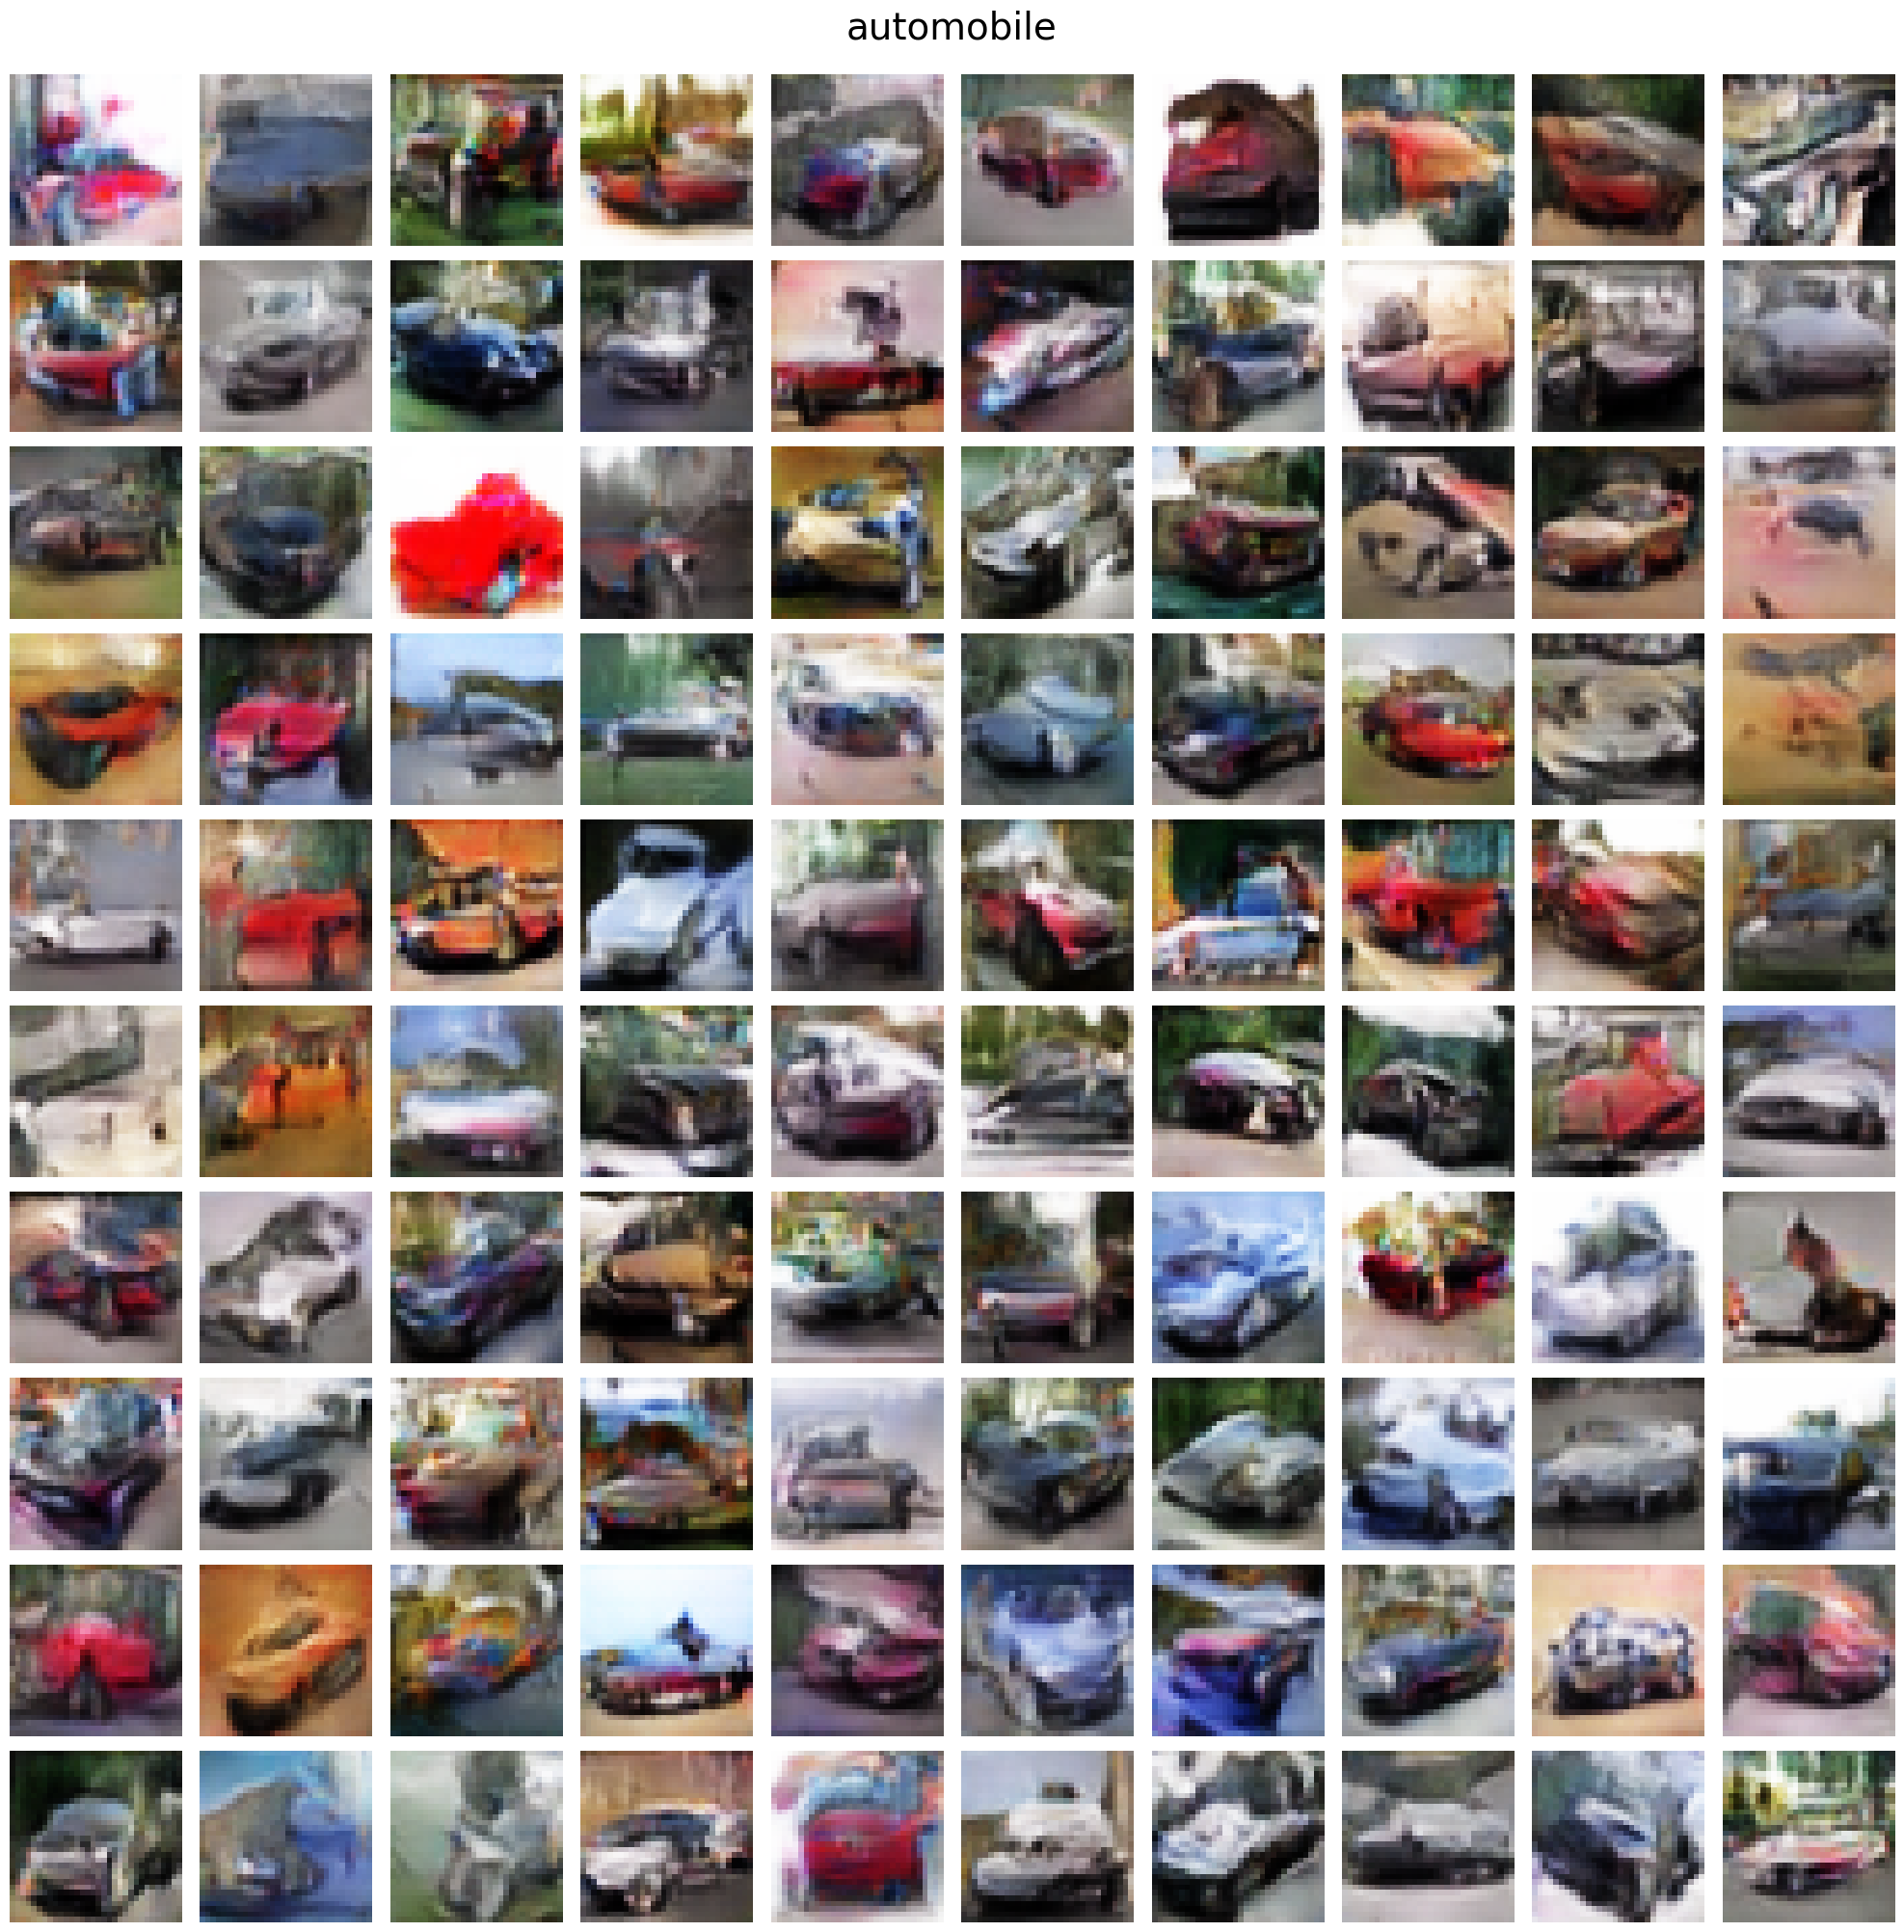

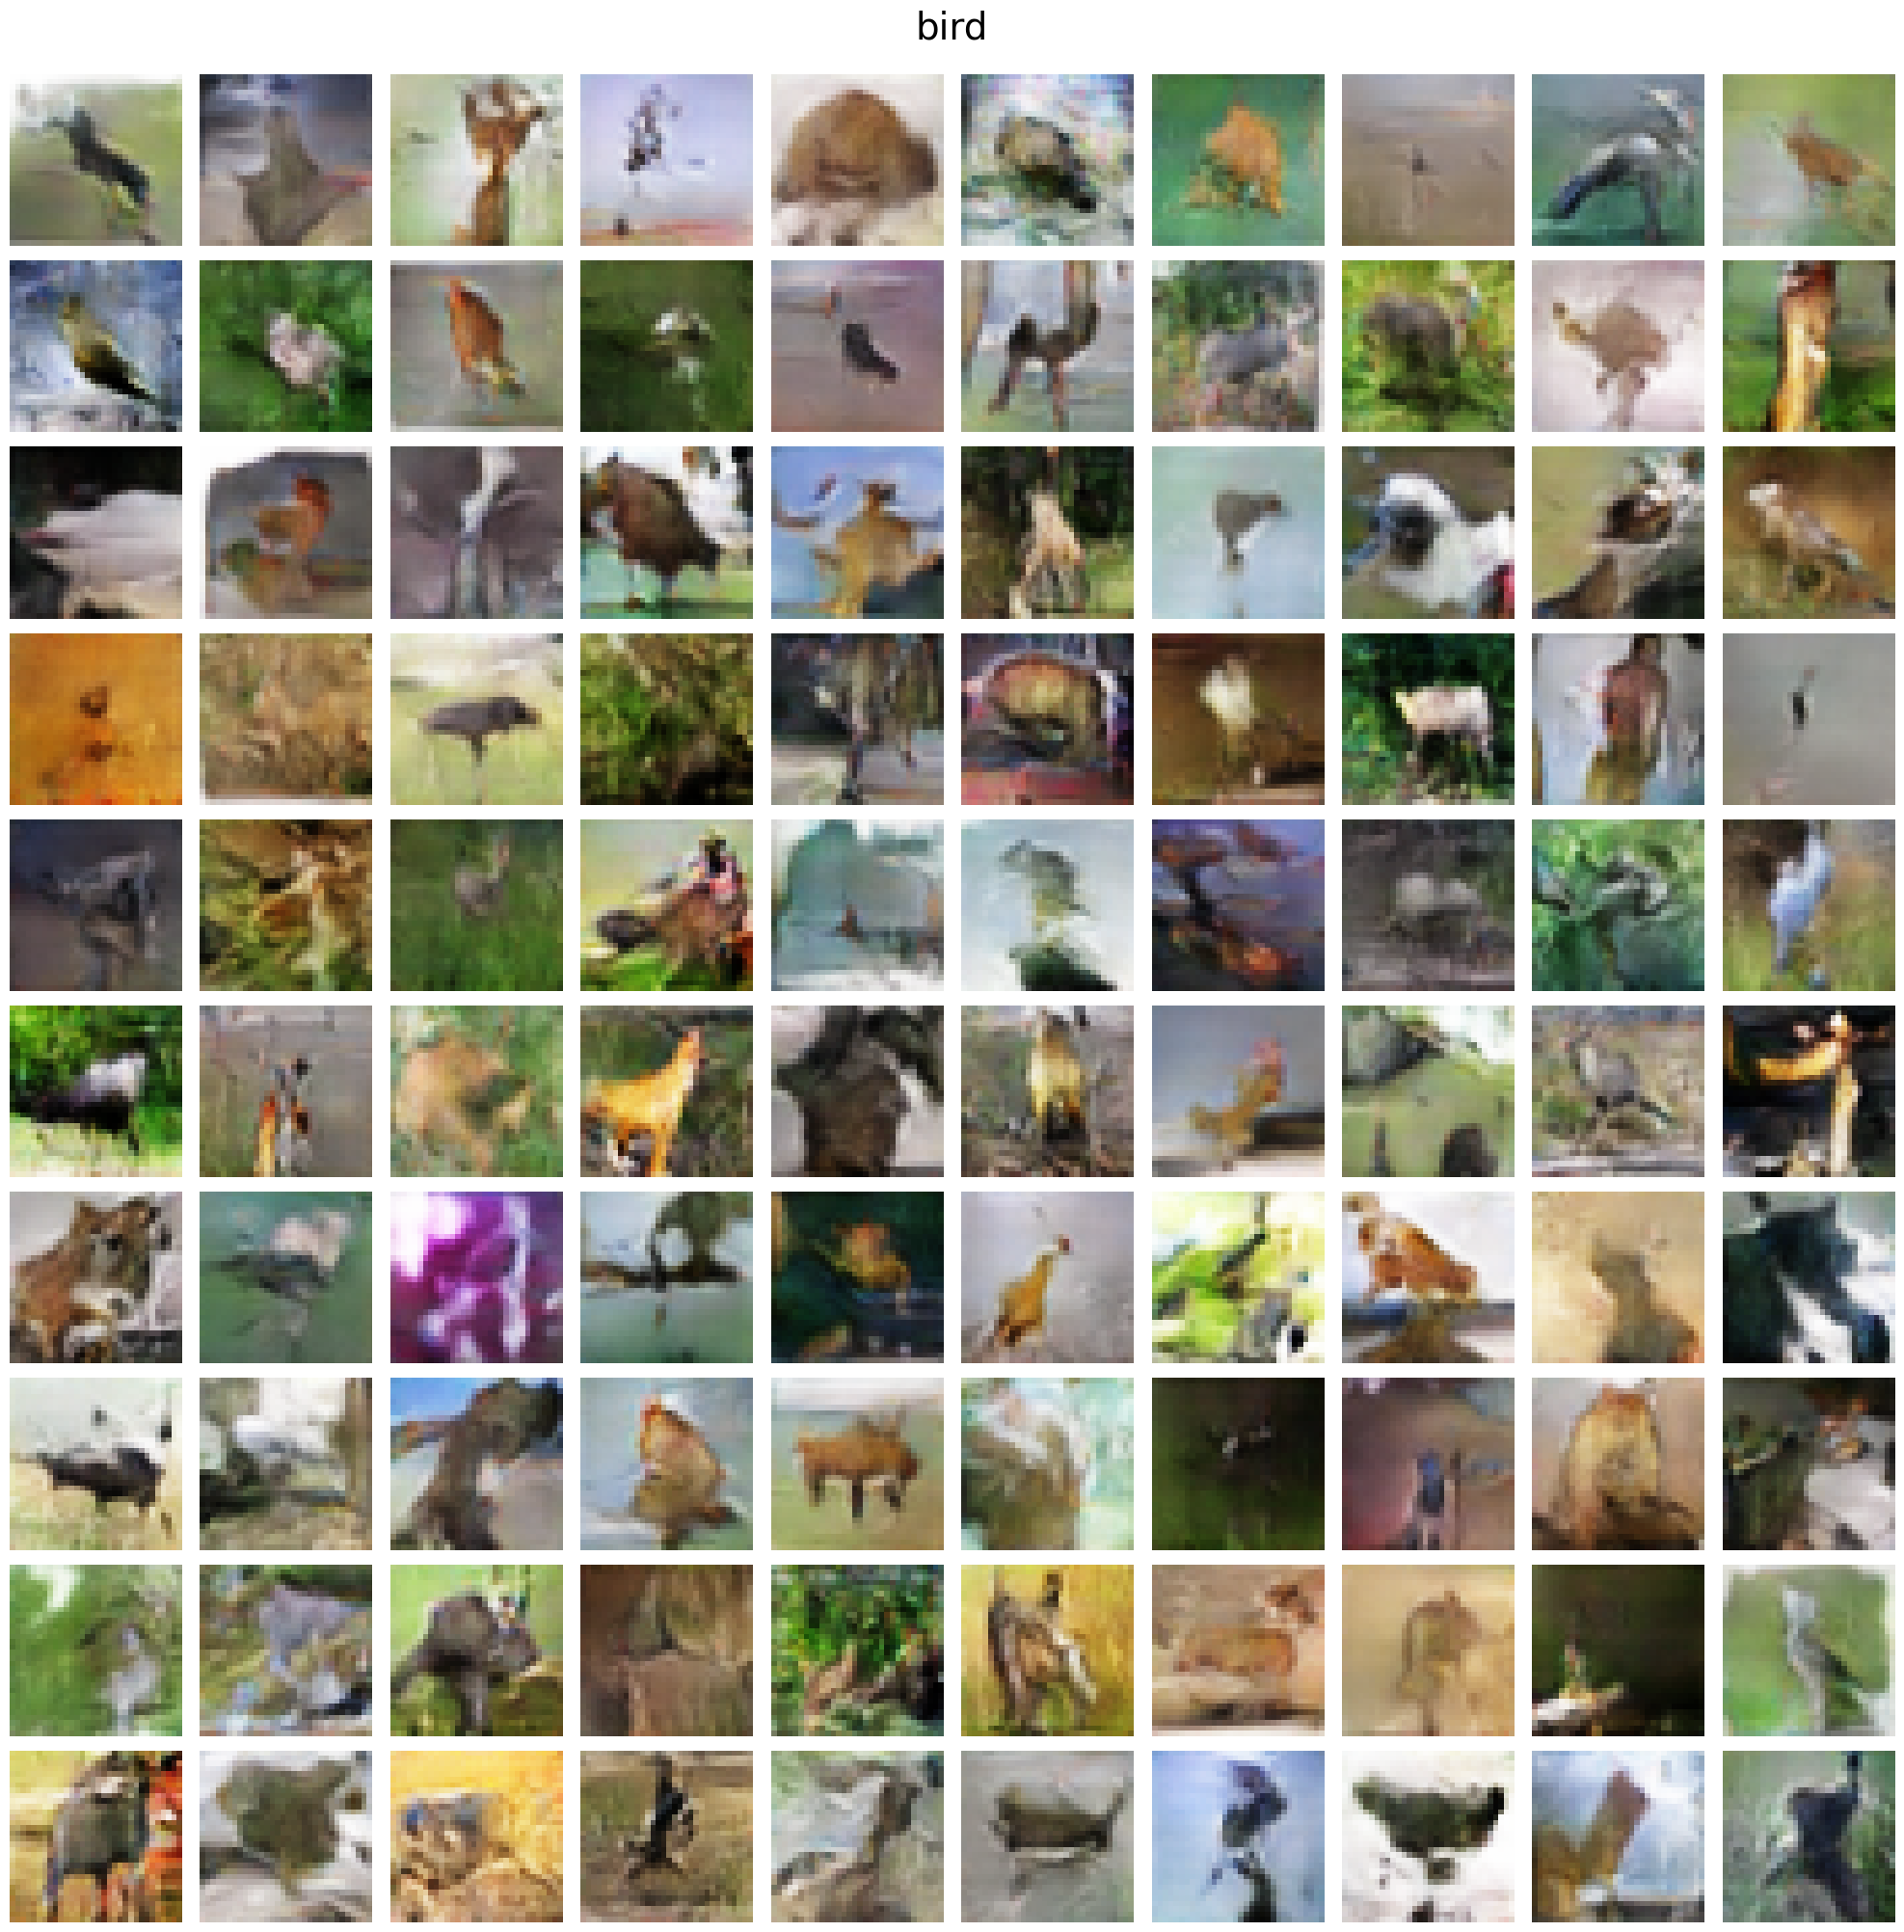

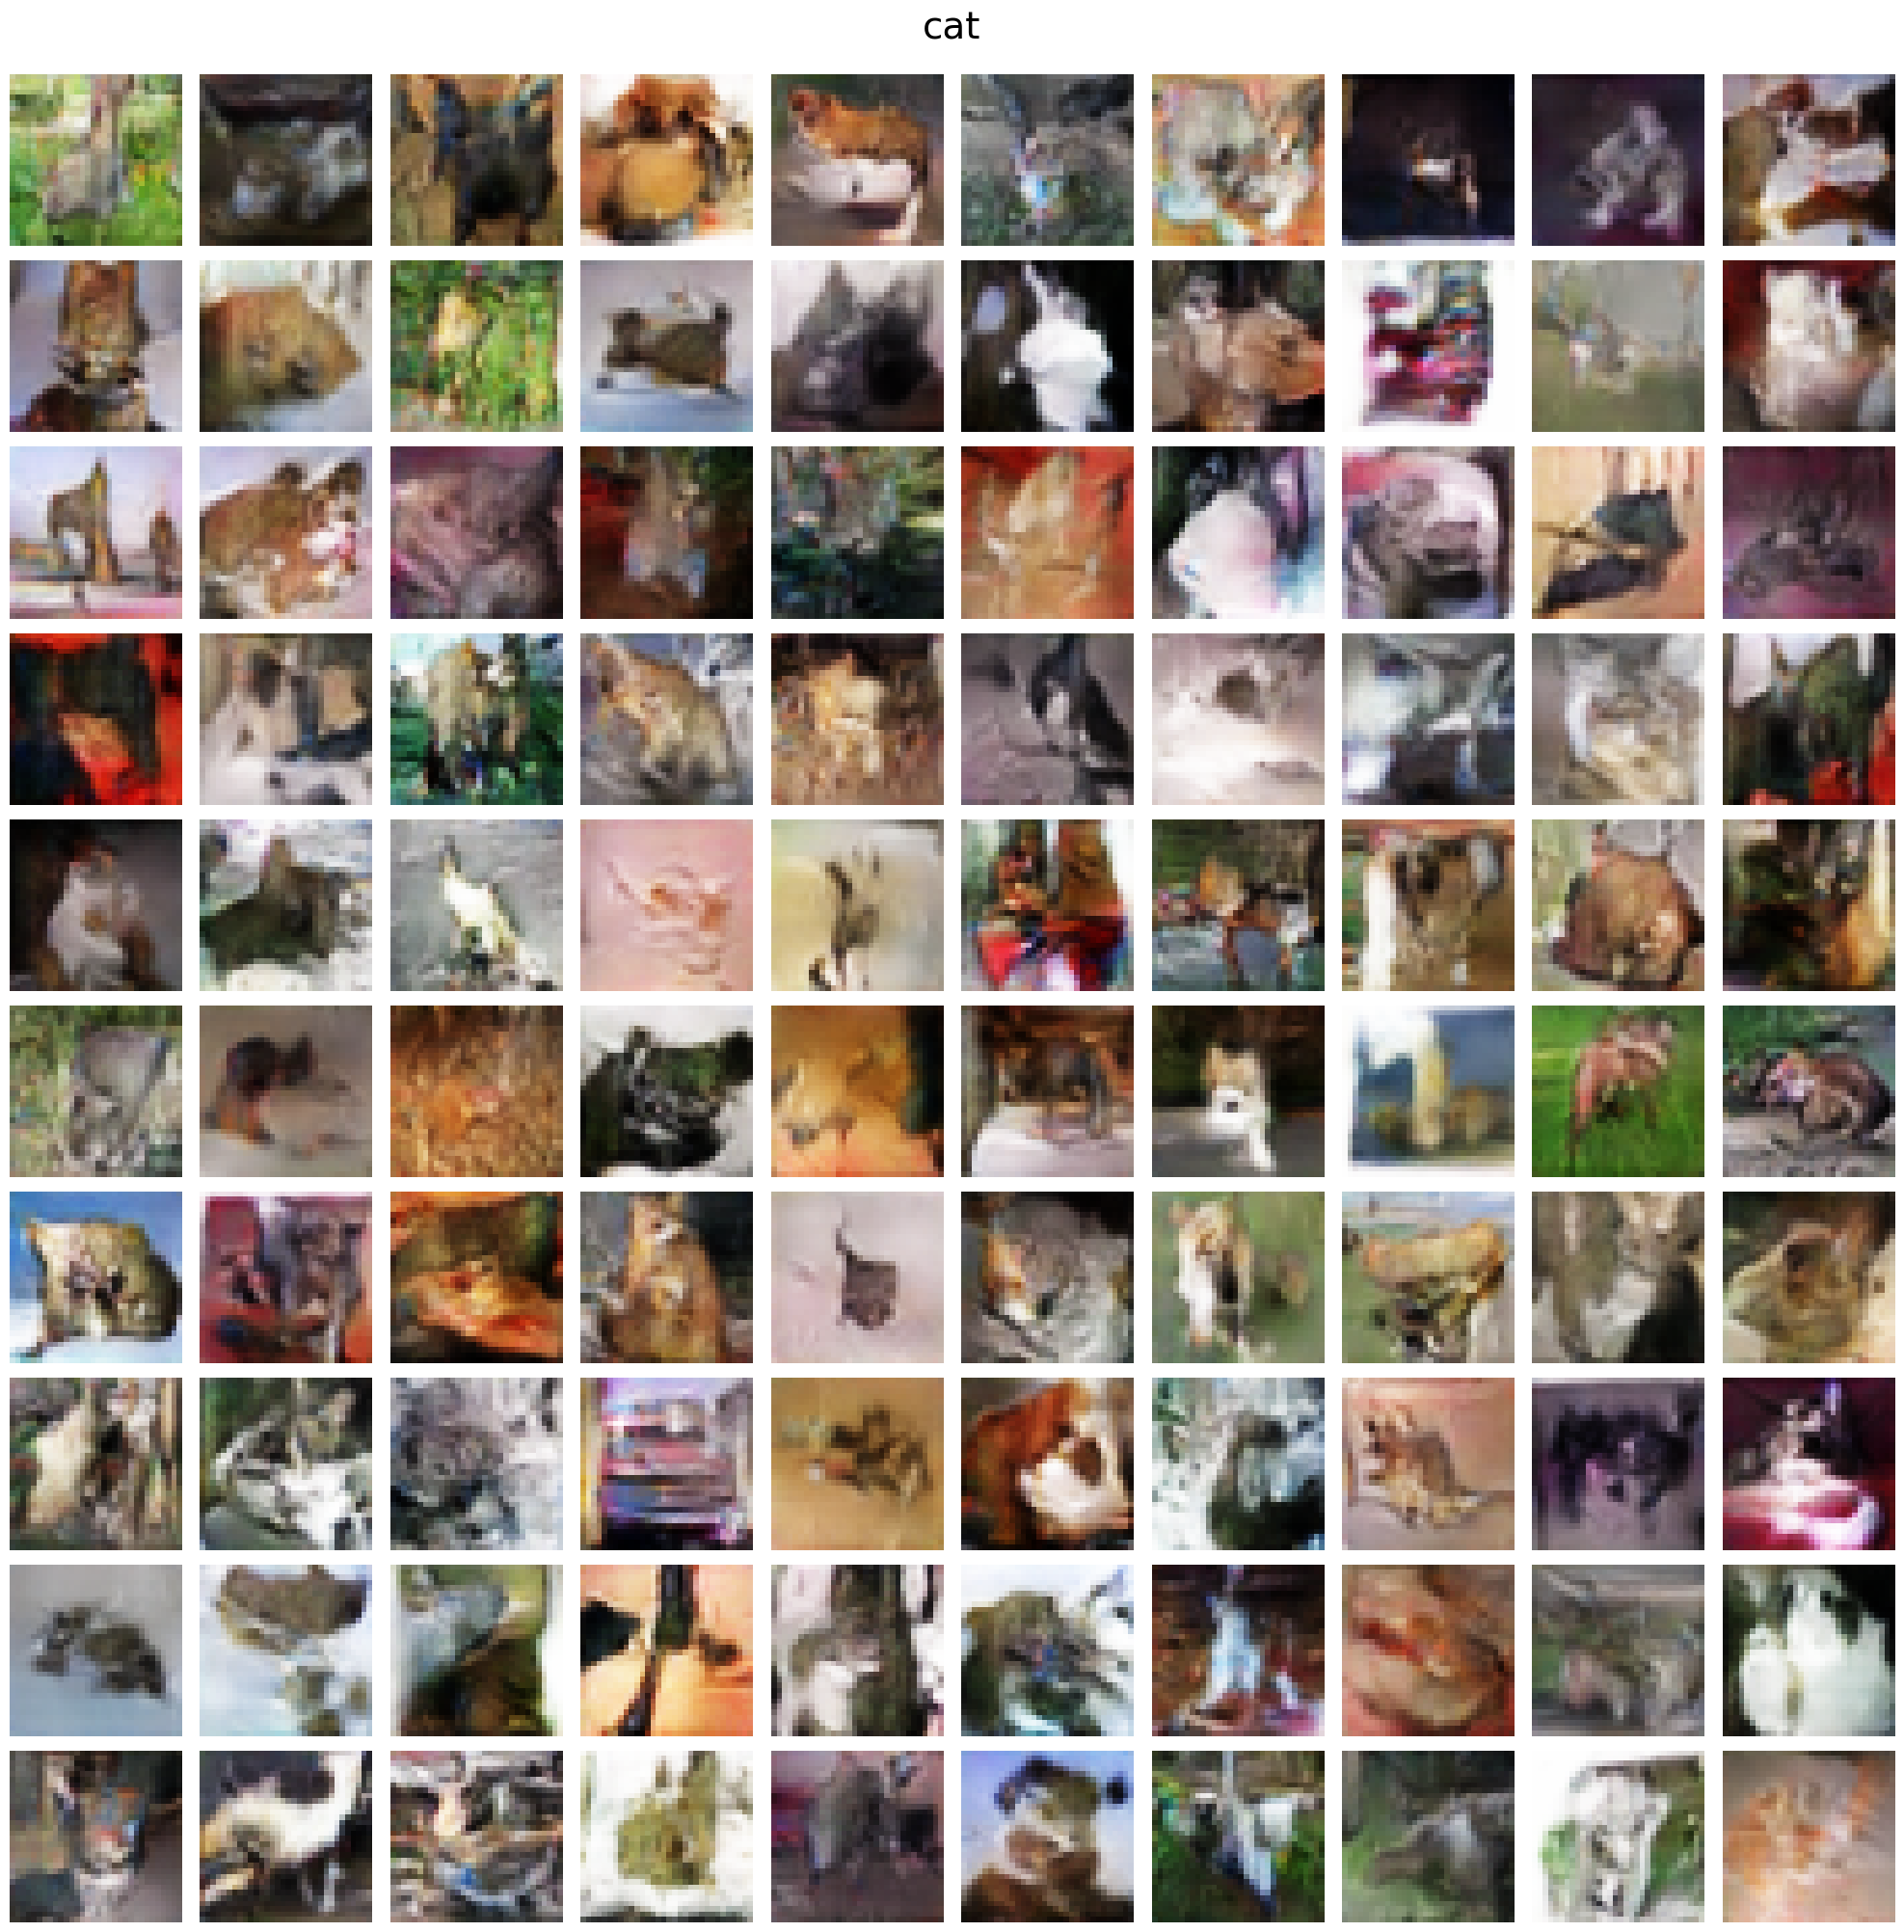

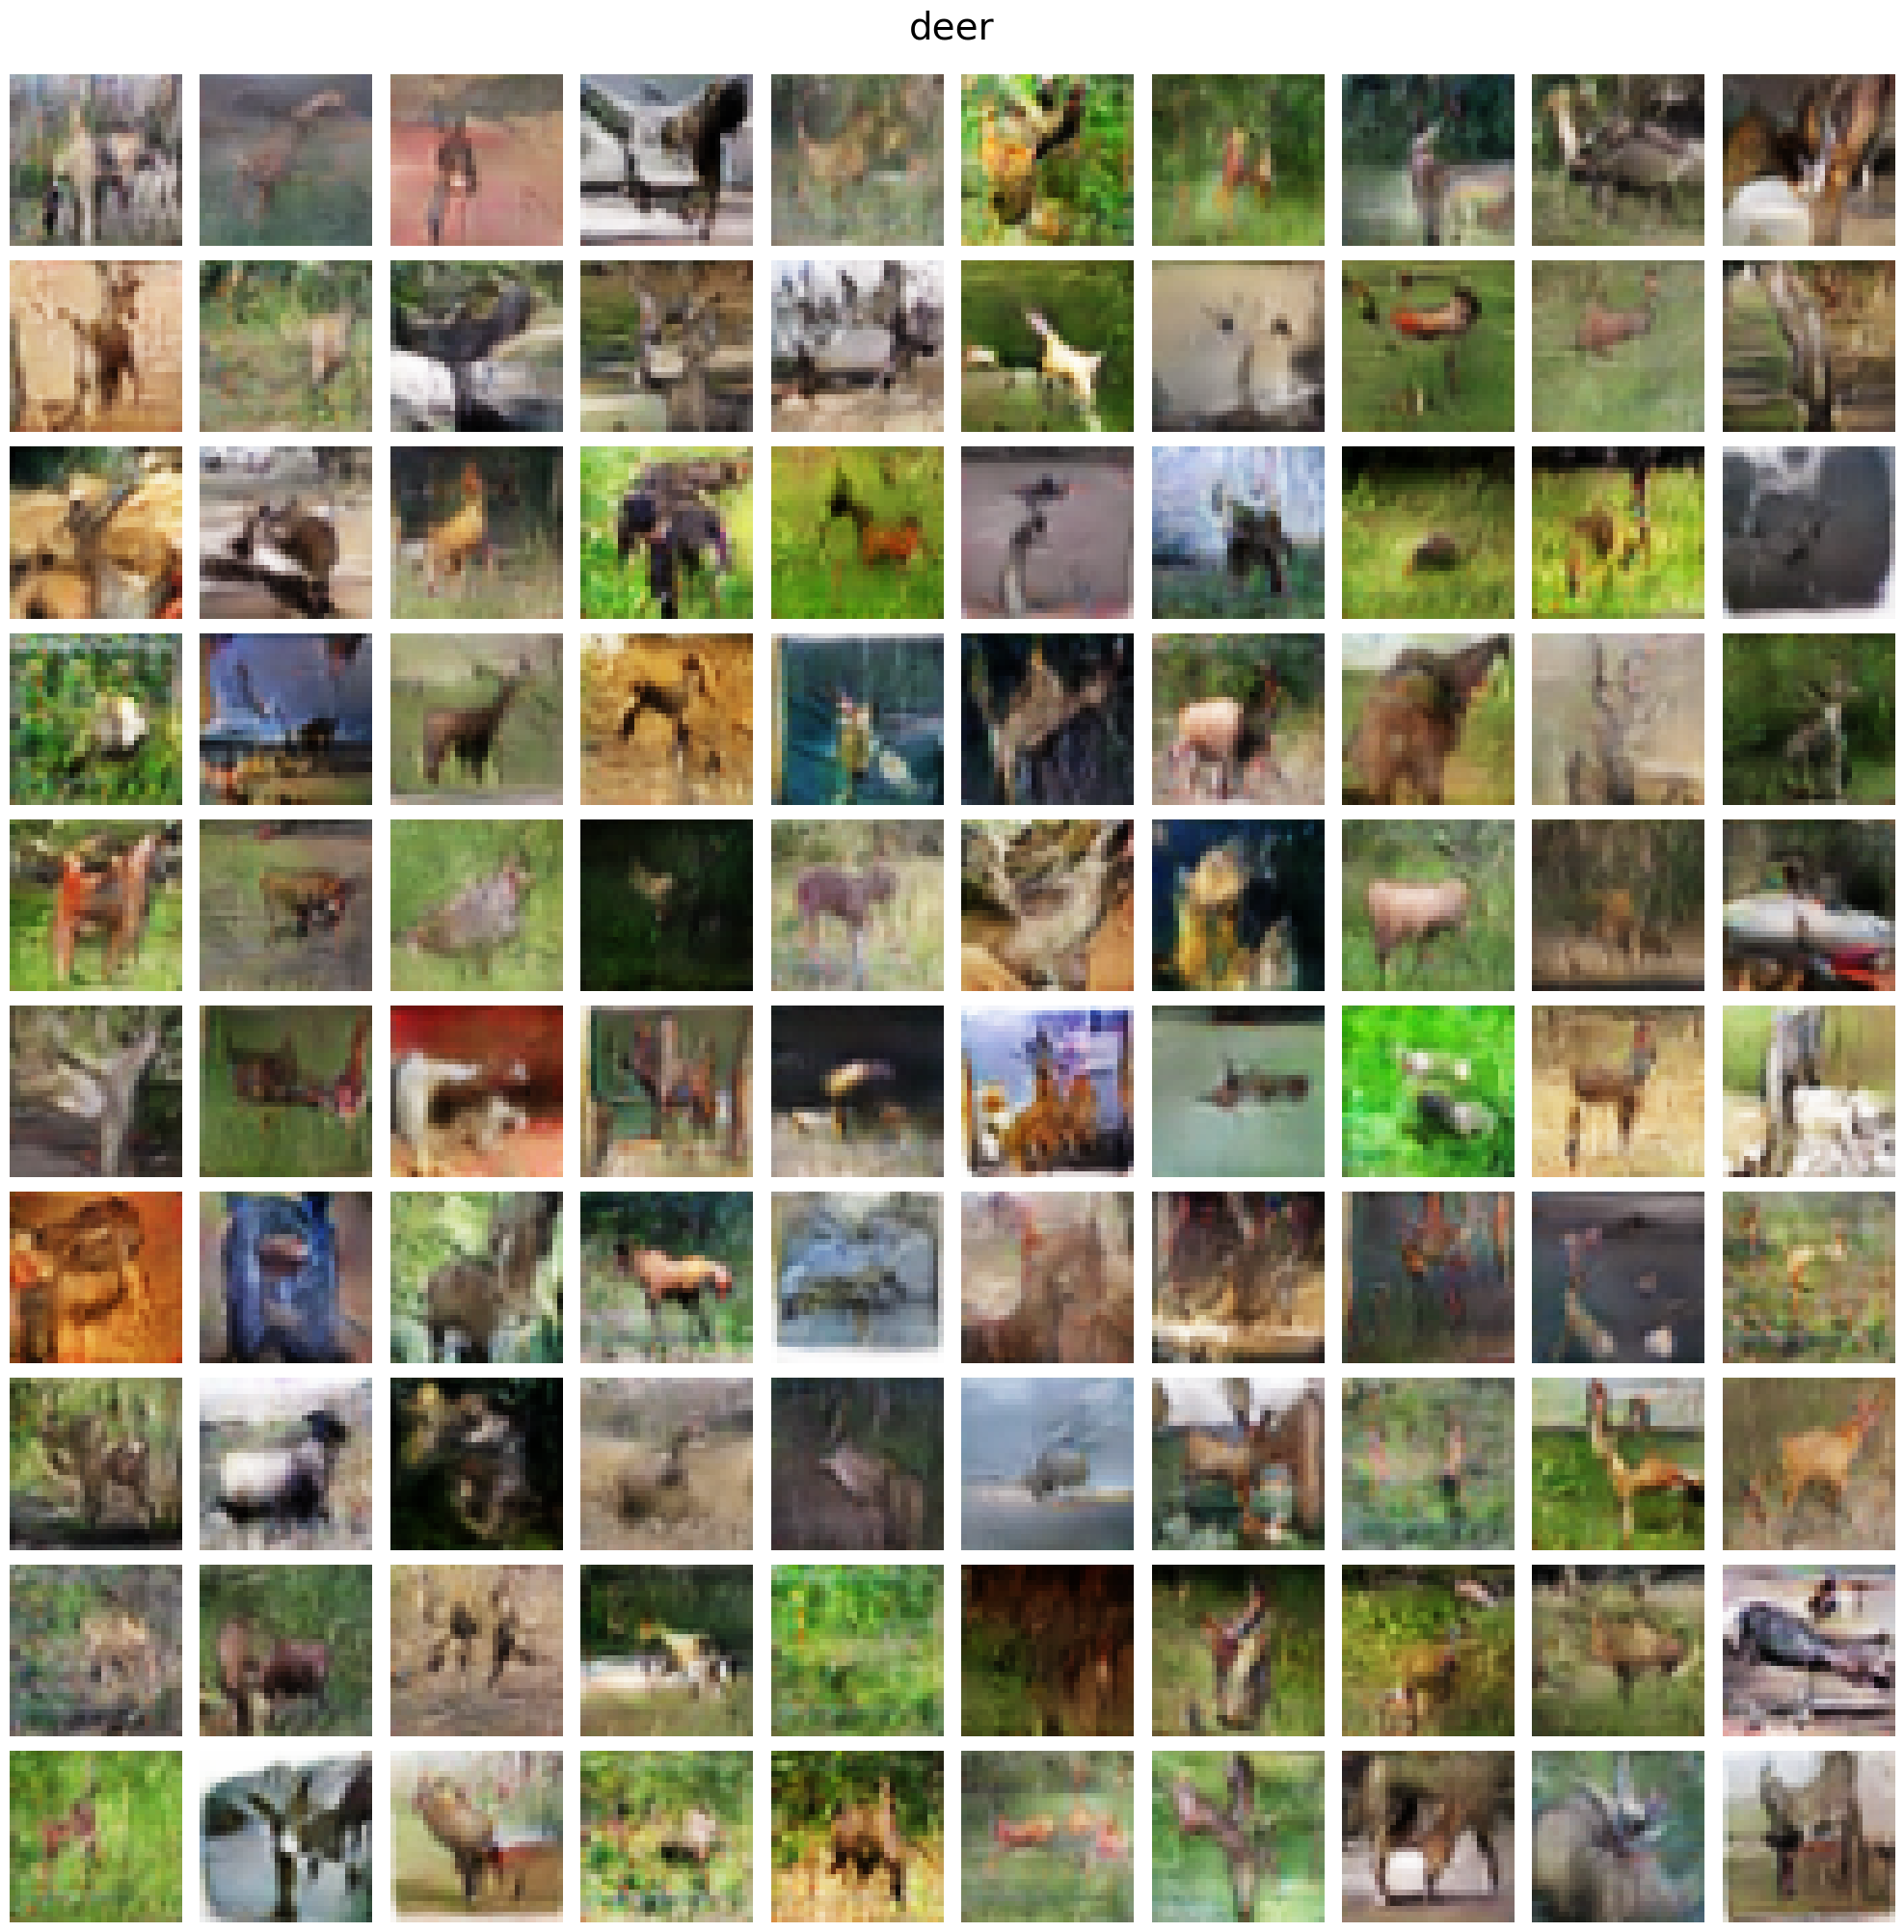

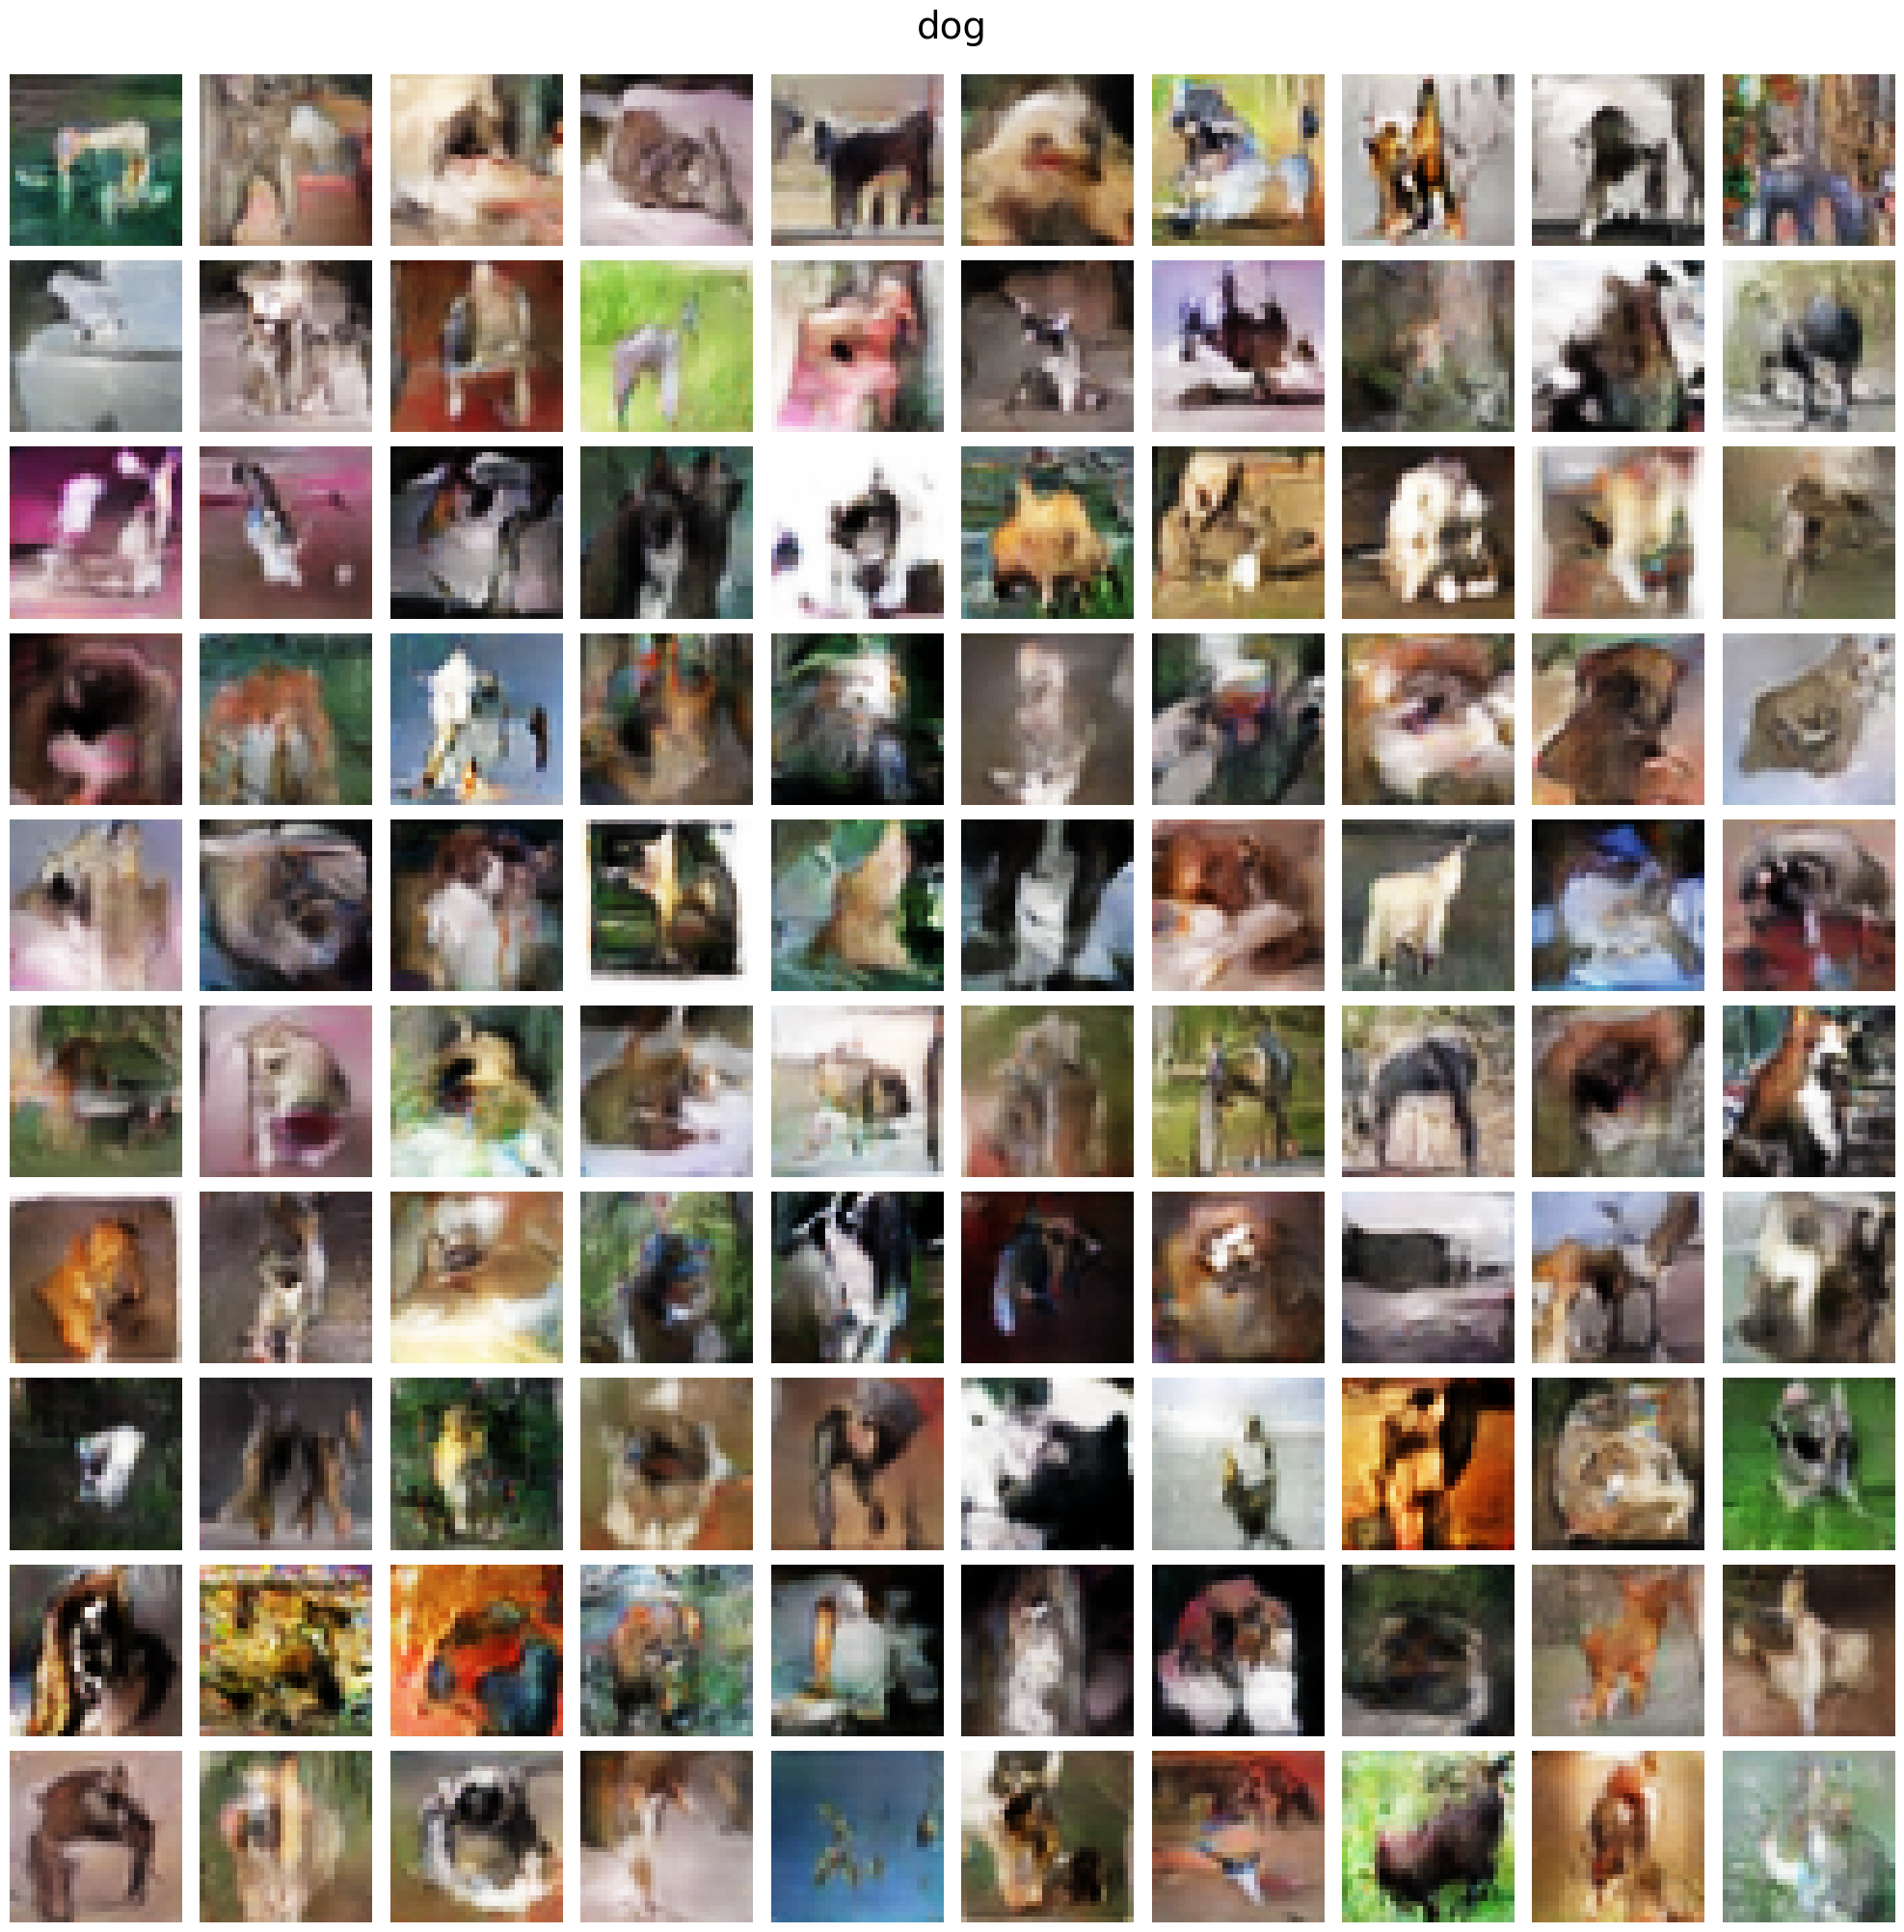

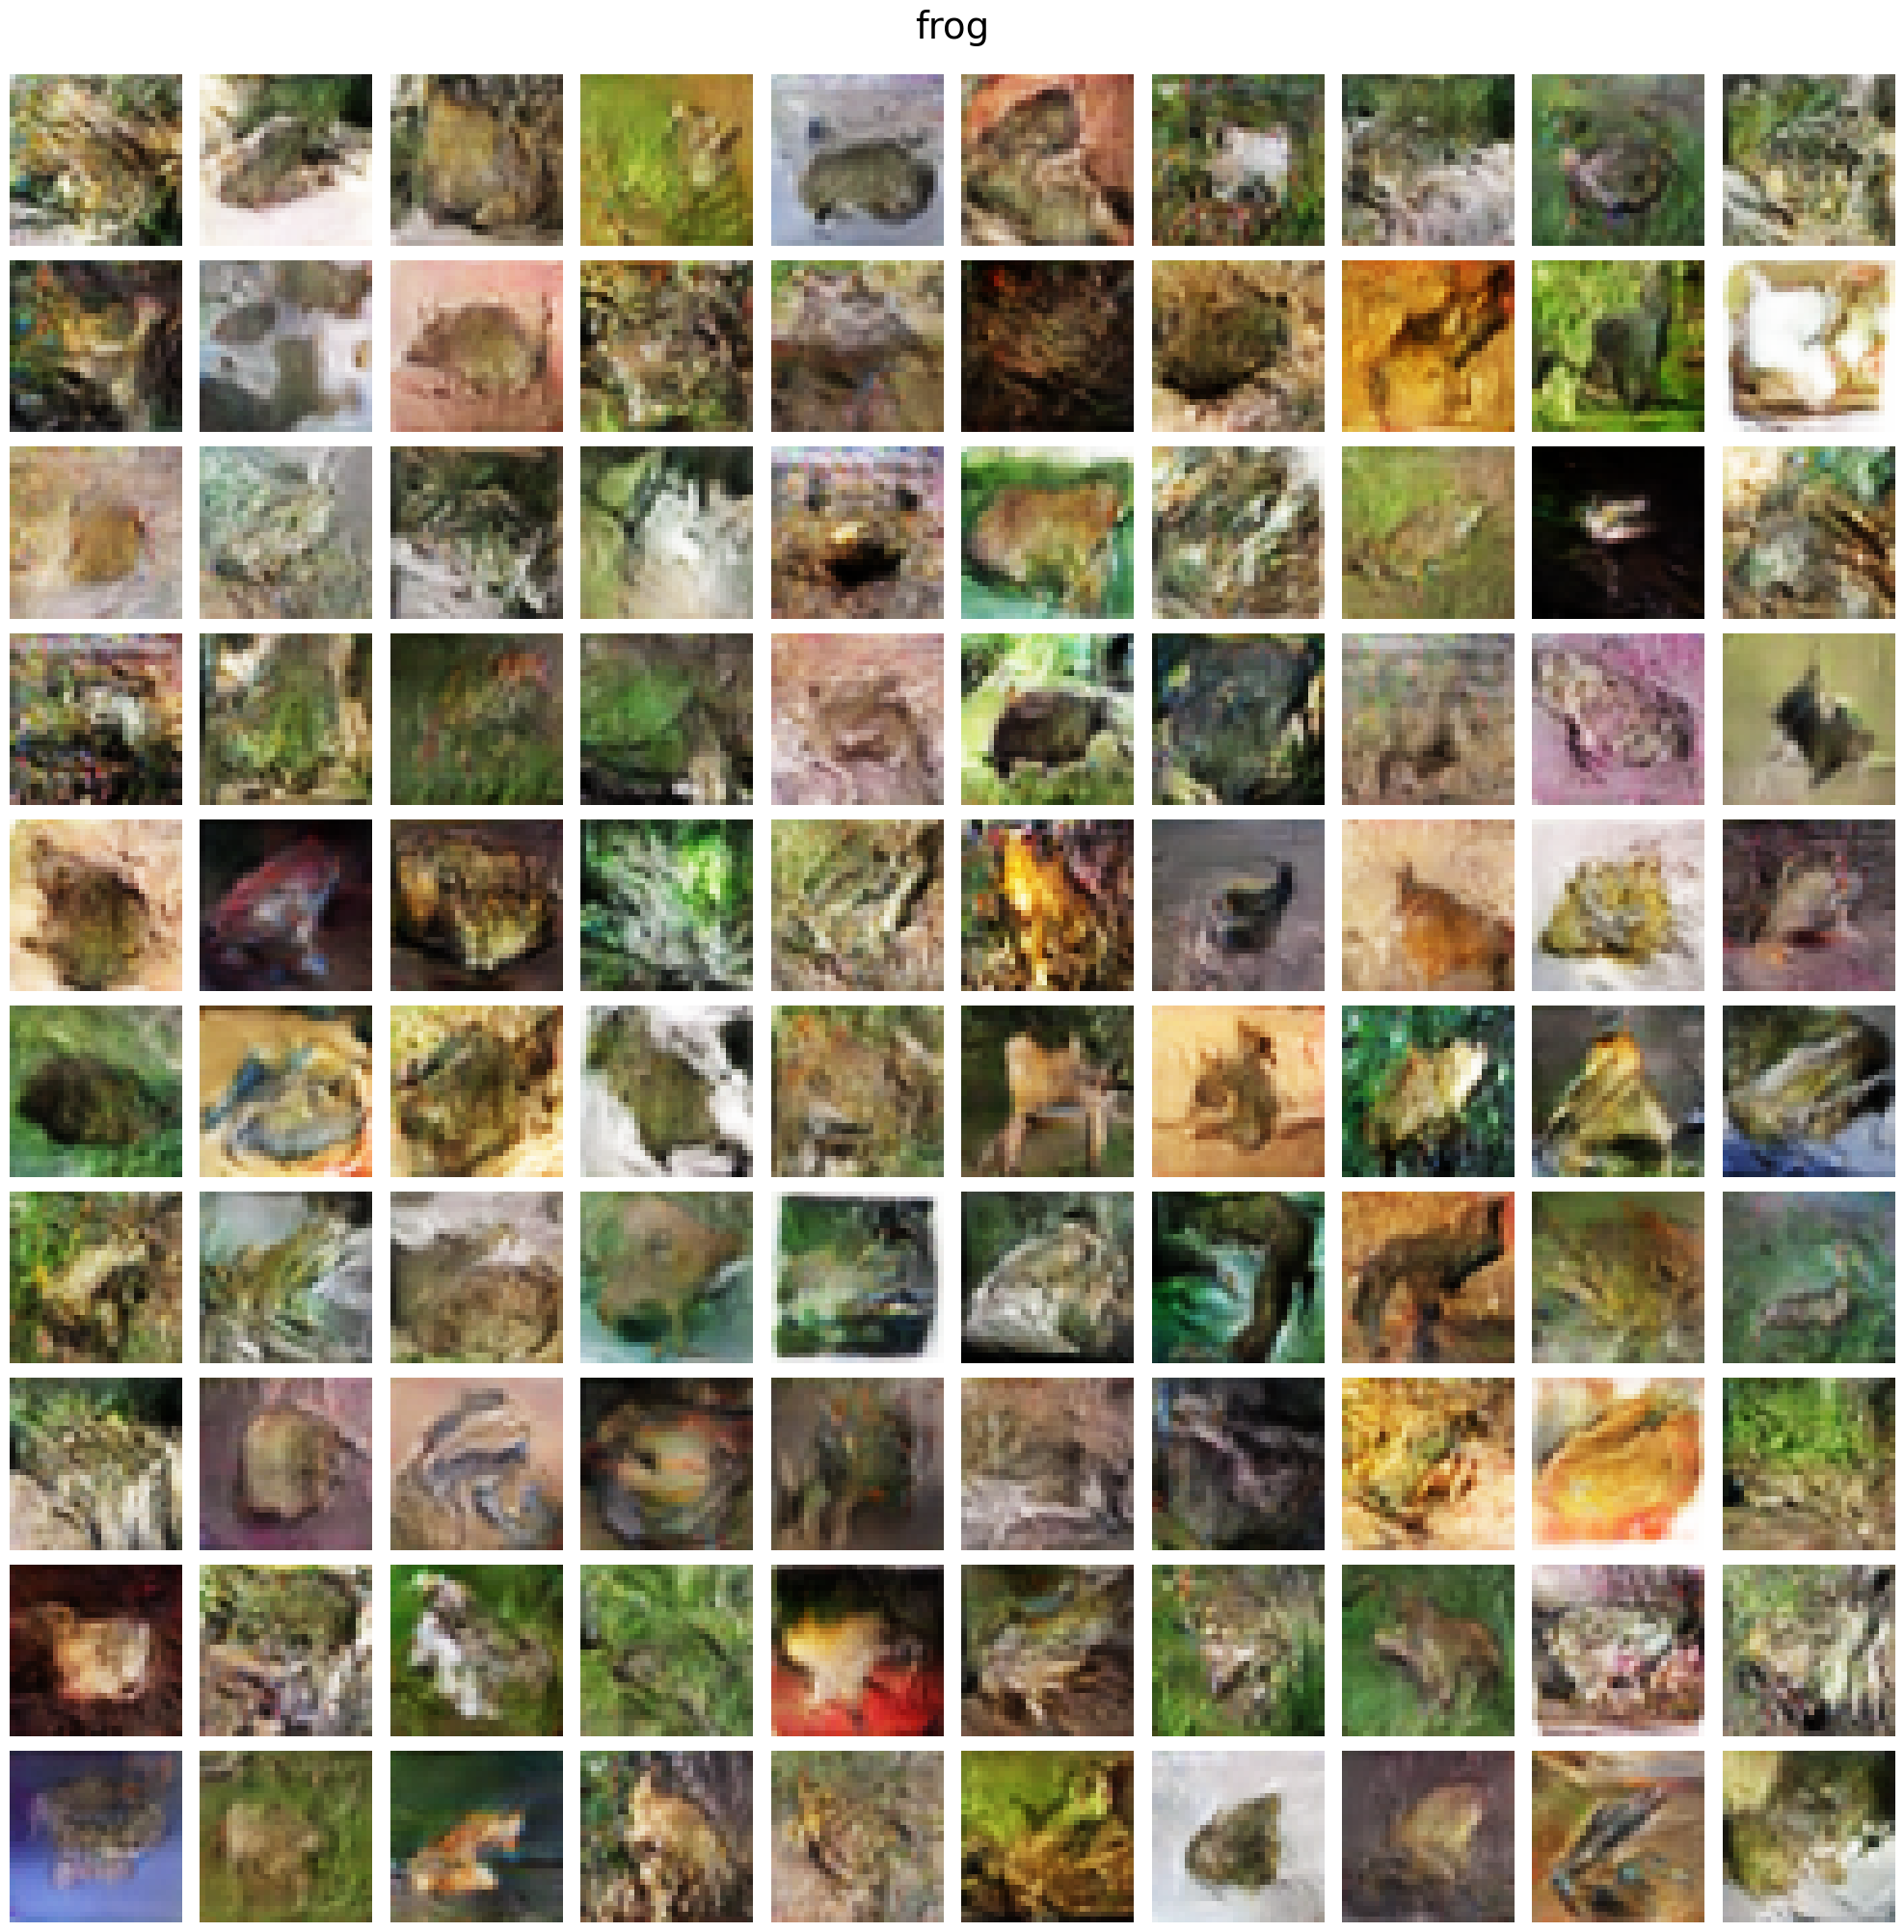

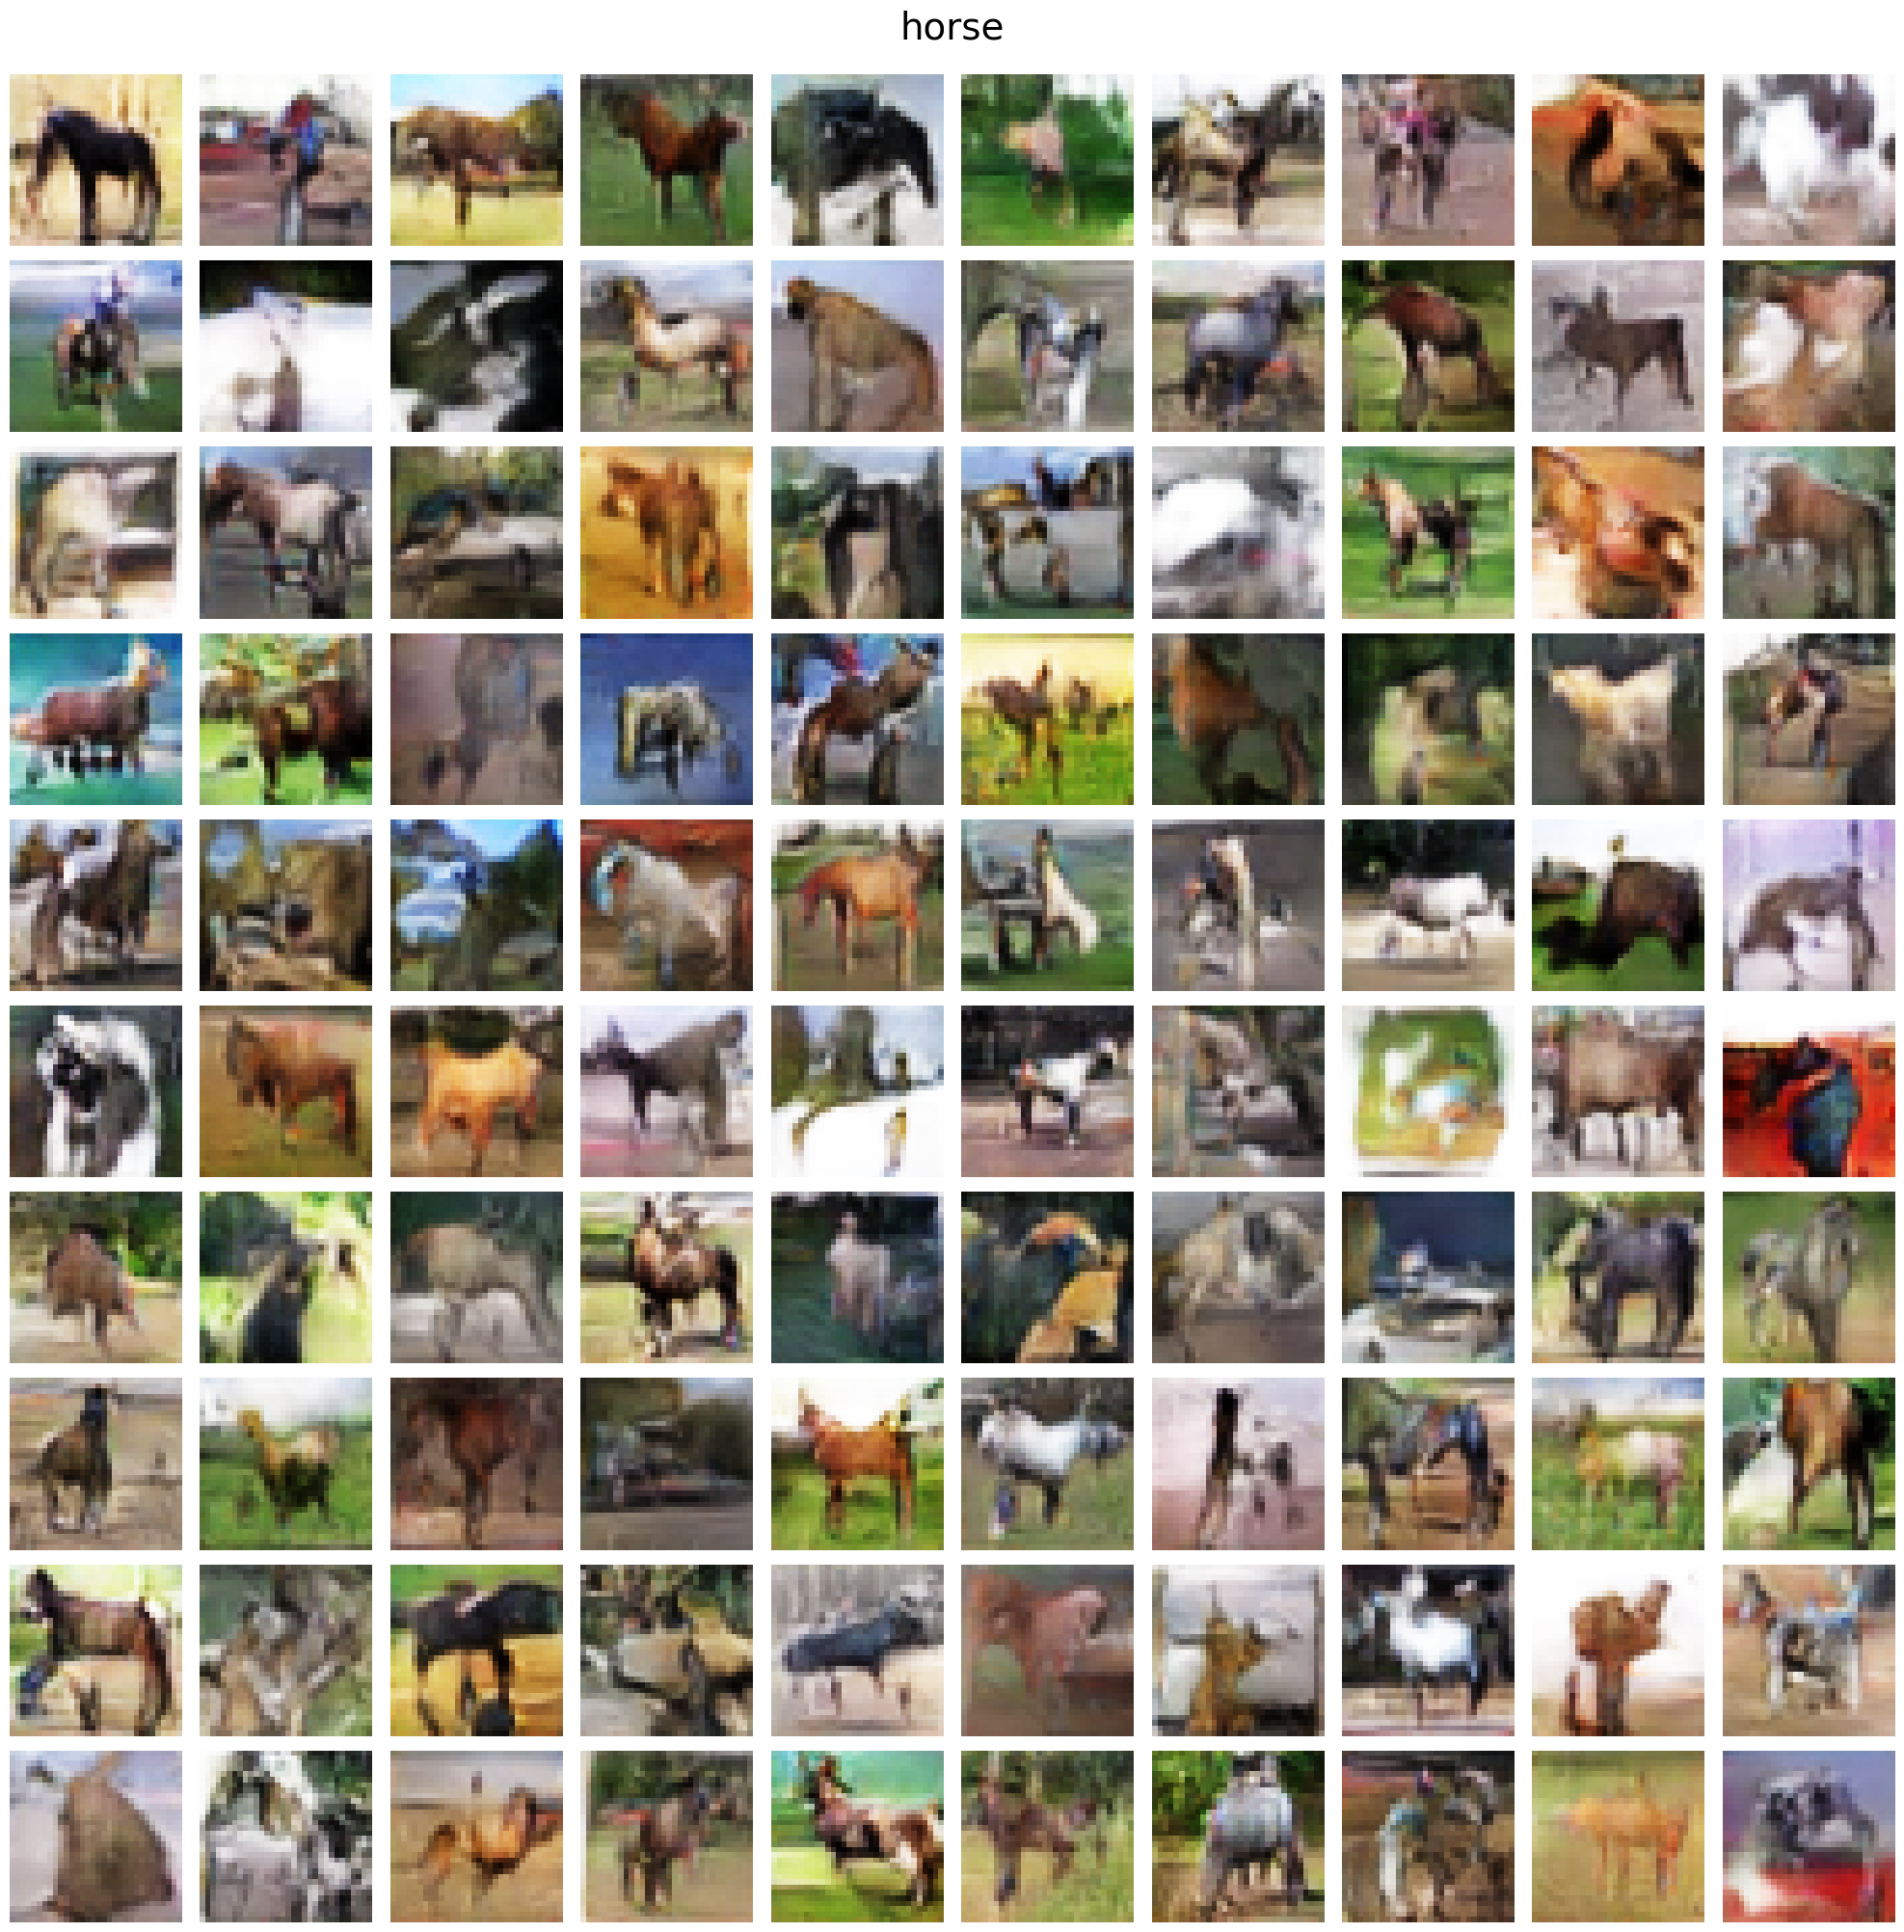

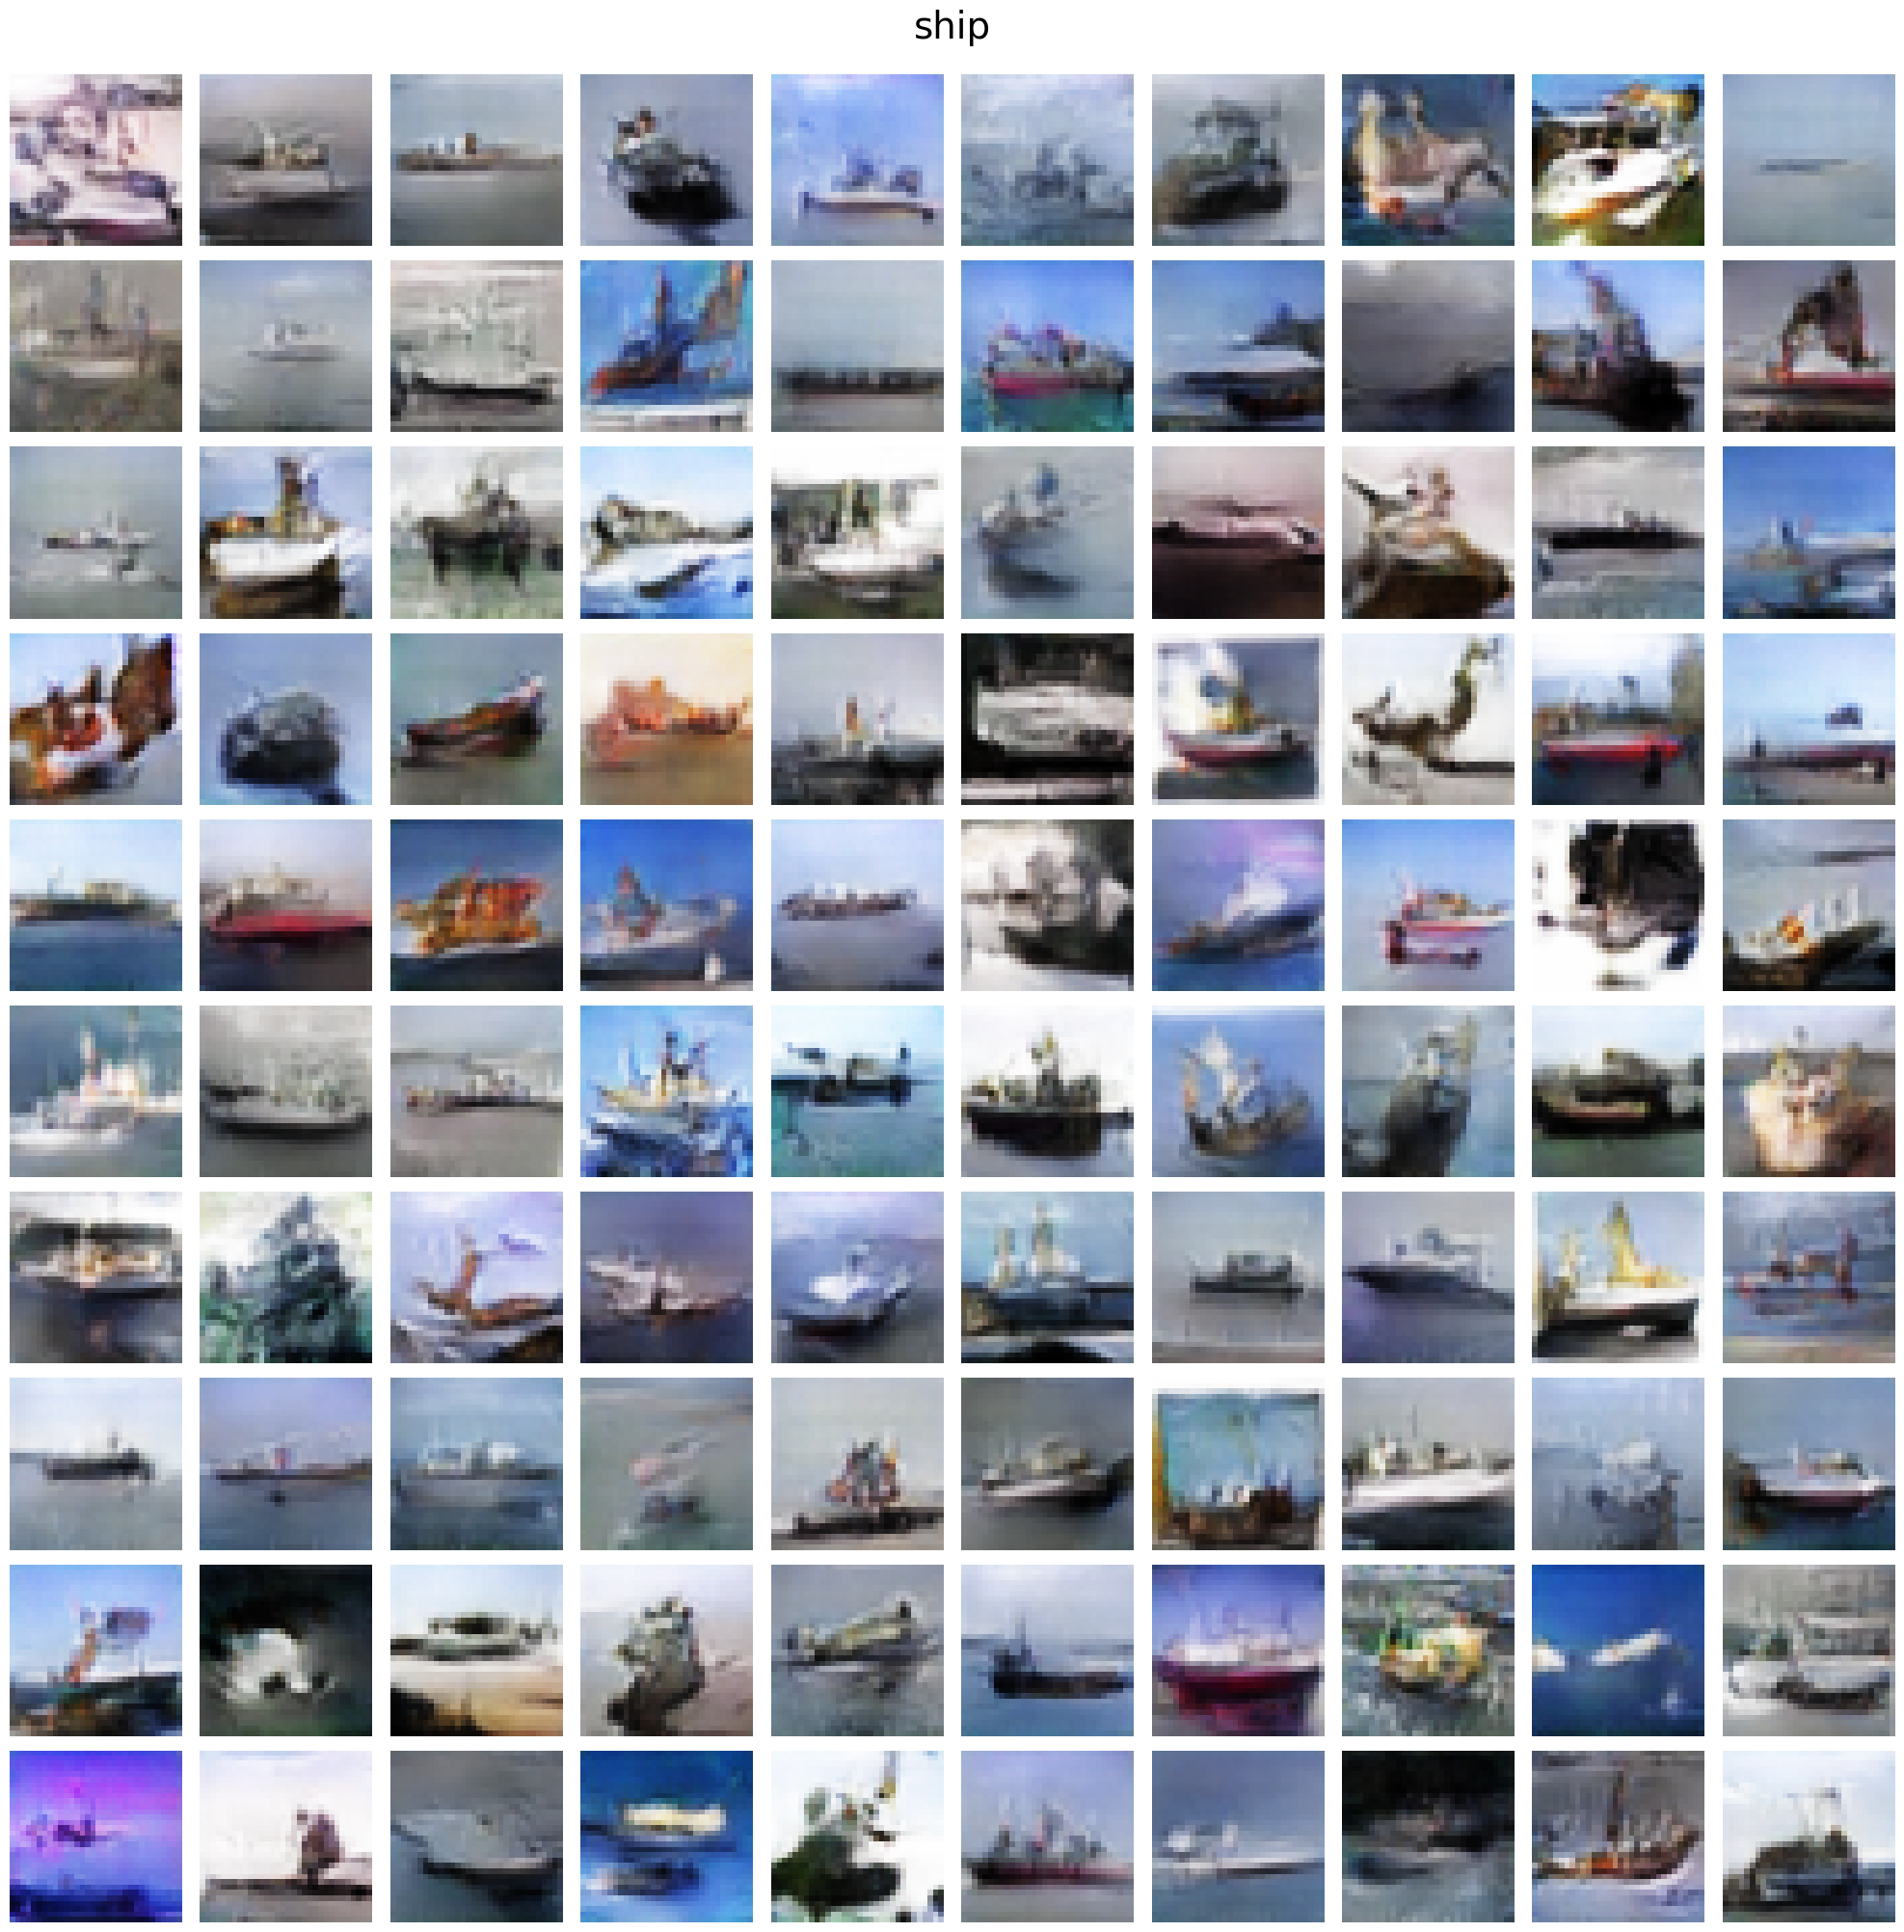

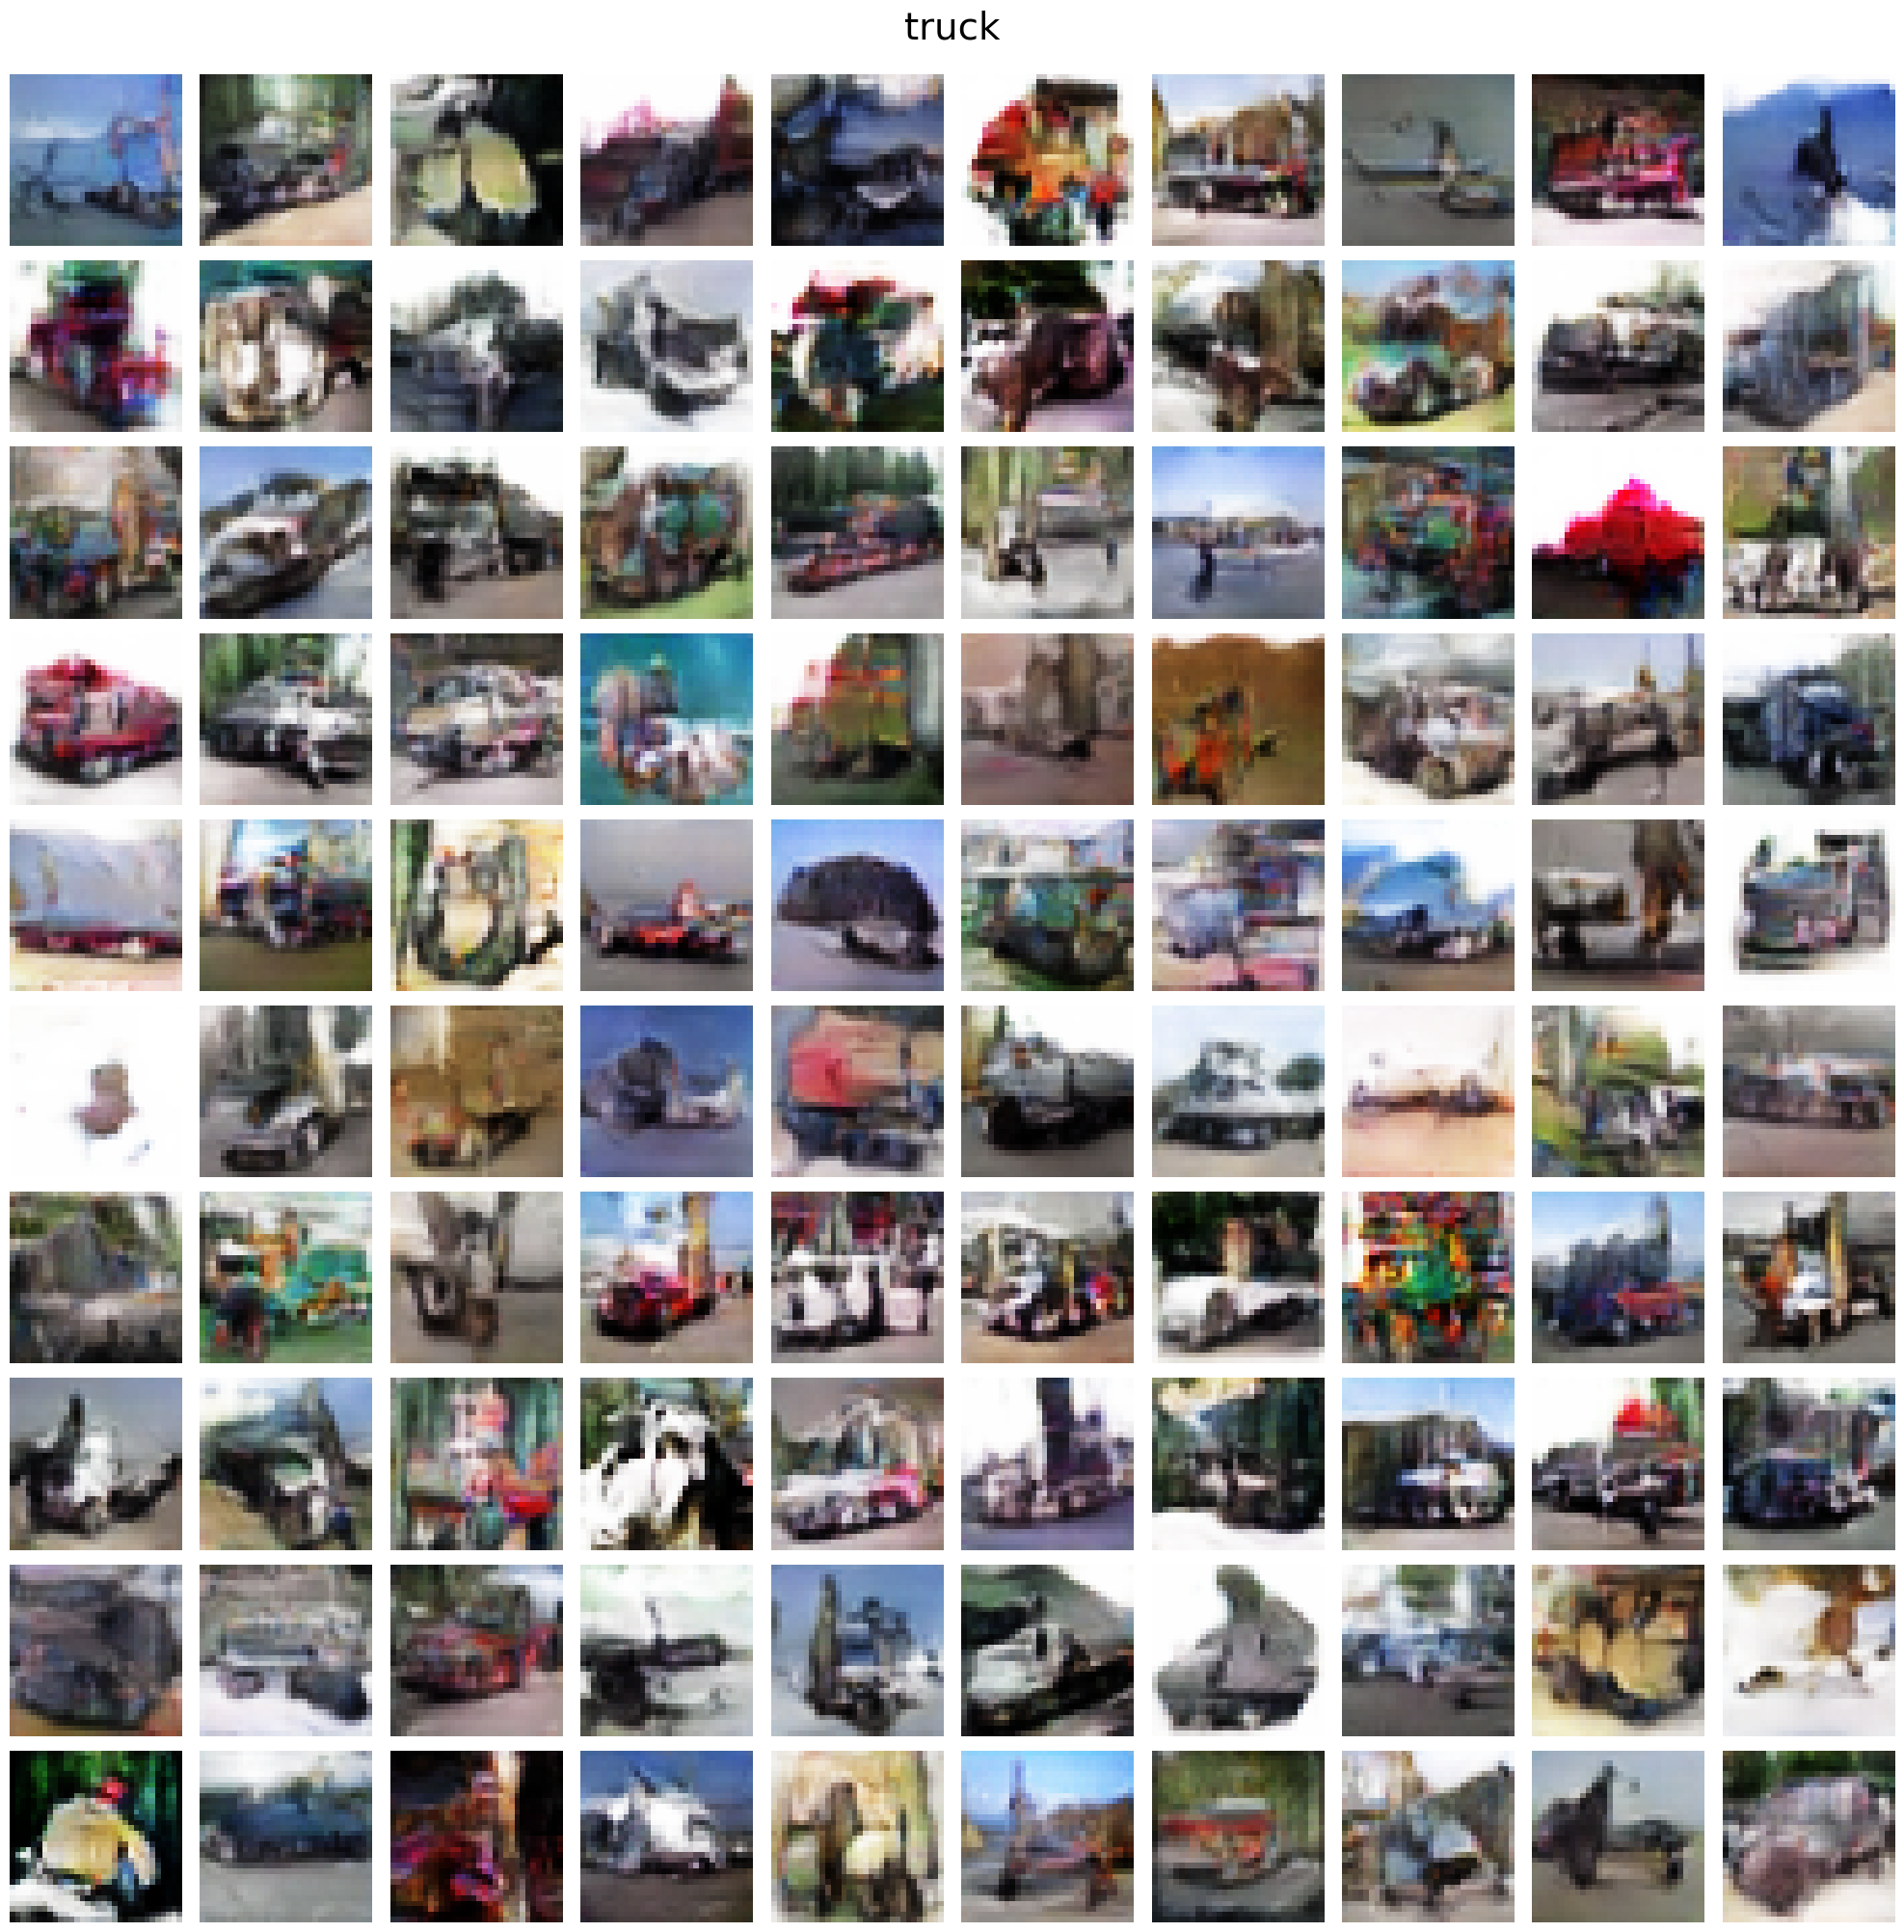

In [4]:
for i in range(10):
    # creating conditions and noise
    conditions = np.full(100, i)
    conditions = tf.keras.utils.to_categorical(conditions, 10)
    latent_z = np.random.normal(size=(100, 128))
    
    imgs = gan_generator.predict([latent_z, conditions])
    
    fig = plt.figure(figsize=(20, 20), tight_layout=True)
    for idx, img in enumerate(imgs):
        ax = fig.add_subplot(10, 10, idx+1)
        ax.imshow((img + 1) / 2)
        ax.axis('off')
    fig.suptitle(class_names[i], y=1, fontsize=28)
    fig.savefig(fname="./images/ACGAN/{}.jpeg".format(class_names[i]))